In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

In [4]:
# Load data with Flights, Origin and Destination Locations, Dates, Weather, Eras Tour, NFL games, etc.
df = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\final_combined_data.csv', low_memory=False)


Key Columns for Analysis

Date and Time Columns:

date: The date of the flight, useful for temporal analysis. day_of_week: To analyze patterns based on the day of the week. Delay Information:

flight_delay_time: Total delay time for the flight, essential for understanding delay patterns.

arrival_delay and departure_delay: Specific arrival and departure delays for deeper insights.

Delay reasons: carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay can provide insight into what might be causing delays on tour dates.

Flight Characteristics:

op_unique_carrier: Carrier information, which can help determine if certain airlines were more affected. origin_iata and dest_iata: To see if certain routes are more impacted.

Geospatial Information:

origin_latitude, origin_longitude, dest_latitude, dest_longitude: Useful for visualizing delays geographically. origin_city and dest_city: Helpful for identifying specific cities involved in the analysis.

Weather Information:

prcp, snow, snwd, tmax, tmin: Weather data can provide context on whether delays were influenced by weather conditions. Tour Indicators:

tour_date: Indicates if the flight is on a tour date.

eras_tour: If this column is set, it can signify the specific tour event impacting the flight.

Flight Count on Tour Dates vs. Non-Tour Dates:

Analyze how many flights occurred on tour dates compared to non-tour dates. Delay Patterns:

Calculate average, median delays for flights on tour dates versus non-tour dates. Visualize the distribution of delays with box plots. Impact by Airline:

Investigate if certain carriers experienced more delays on tour dates. Weather Analysis:

Examine whether weather conditions during tour dates contributed to delays. Time Series Analysis:

Look at how delays varied over time, especially around tour dates.

Investigate how Taylor Swift's Eras Tour impacts domestic Flight Delays

In [7]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'iata_dest_d

In [8]:
df['eras_tour']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
15118728    NaN
15118729    NaN
15118730    NaN
15118731    NaN
15118732    NaN
Name: eras_tour, Length: 15118733, dtype: object

In [9]:
# Define tour and non-tour dates
tour_flights = df[df['eras_tour'] == 'tour_date']
non_tour_flights = df[df['eras_tour'] == '']


In [10]:


# Define tour and non-tour dates
# Define tour and non-tour flights based on values in 'eras_tour'
tour_flights = df[df['eras_tour'] == 'tour_date']

# Define non-tour flights as those with NaN in 'eras_tour'
non_tour_flights = df[df['eras_tour'].isna()]


In [11]:
# If 'eras_tour' has NaNs or other unexpected values, replace them
df['eras_tour'] = df['eras_tour'].fillna('non_tour')
df['eras_tour'].head()

0    non_tour
1    non_tour
2    non_tour
3    non_tour
4    non_tour
Name: eras_tour, dtype: object

In [12]:
# Ensure 'date' column is in datetime format for both tour and non-tour flights
non_tour_flights['date'] = pd.to_datetime(non_tour_flights['date'])
tour_flights['date'] = pd.to_datetime(tour_flights['date'])

# Define the date range for filtering
max_date = '2023-08-16'
min_date = '2023-04-30'

# Filter the DataFrames to only keep rows with dates within the specified range
non_tour_flights_filtered = non_tour_flights[(non_tour_flights['date'] > min_date) & (non_tour_flights['date'] <= max_date)]
tour_flights_filtered = tour_flights[(tour_flights['date'] > min_date) & (tour_flights['date'] <= max_date)]

# Check the min and max date after filtering to ensure it's correct
print(f"Min Date (non-tour flights): {non_tour_flights_filtered['date'].min()}")
print(f"Max Date (non-tour flights): {non_tour_flights_filtered['date'].max()}")
print(f"Min Date (tour flights): {tour_flights_filtered['date'].min()}")
print(f"Max Date (tour flights): {tour_flights_filtered['date'].max()}")

# Optionally, view the first few rows of the filtered DataFrames
print(non_tour_flights_filtered.head())
print(tour_flights_filtered.head())


C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\215332968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_tour_flights['date'] = pd.to_datetime(non_tour_flights['date'])
C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\215332968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tour_flights['date'] = pd.to_datetime(tour_flights['date'])


Min Date (non-tour flights): 2023-05-01 00:00:00
Max Date (non-tour flights): 2023-08-16 00:00:00
Min Date (tour flights): 2023-05-05 00:00:00
Max Date (tour flights): 2023-08-09 00:00:00
  day_of_week       date op_unique_carrier tail_num  op_carrier_fl_num  \
0      monday 2023-05-01                9e   n131ev               4888   
1      monday 2023-05-01                oo   n905ev               5331   
2      monday 2023-05-01                oo   n908ev               4761   
3      monday 2023-05-01                oo   n908ev               4761   
4      monday 2023-05-01                oo   n908ev               5529   

  origin_iata   origin_city dest_iata    dest_city  crs_dep_time  ...  \
0         cvg    cincinnati       msp  minneapolis           754  ...   
1         sbn    south bend       ord      chicago           460  ...   
2         psp  palm springs       lax  los angeles           524  ...   
3         psp  palm springs       lax  los angeles           524  ...   
4 

In [13]:
# Ensure the 'date' column is in datetime format (if not already)
non_tour_flights['date'] = pd.to_datetime(df['date'])
tour_flights['date'] = pd.to_datetime(df['date'])

# Define the max date for filtering
max_date = '2023-08-16'
min_date= '2023-04-30'
# Filter the DataFrame to only keep rows with dates more than than the min date
non_tour_flights_filtered = non_tour_flights[non_tour_flights['date'] > min_date]
tour_flights_filtered = tour_flights[tour_flights['date'] > min_date]

# Filter the DataFrame to only keep rows with dates less than or equal to the max date
non_tour_flights = non_tour_flights[non_tour_flights['date'] <= max_date]
tour_flights = tour_flights[tour_flights['date'] <= max_date]

# Check the min and max date after filtering to ensure it's correct
print(f"Min Date: {non_tour_flights_filtered['date'].min()}")
print(f"Max Date: {non_tour_flights_filtered['date'].max()}")
print(f"Min Date: {tour_flights_filtered['date'].min()}")
print(f"Max Date: {tour_flights_filtered['date'].max()}")

# Optionally, view the first few rows of the filtered DataFrame
print(non_tour_flights_filtered.head())
print(tour_flights_filtered.head())


C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\3971897091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_tour_flights['date'] = pd.to_datetime(df['date'])
C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\3971897091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tour_flights['date'] = pd.to_datetime(df['date'])


Min Date: 2023-05-01 00:00:00
Max Date: 2024-04-30 00:00:00
Min Date: 2023-05-05 00:00:00
Max Date: 2023-08-09 00:00:00
  day_of_week       date op_unique_carrier tail_num  op_carrier_fl_num  \
0      monday 2023-05-01                9e   n131ev               4888   
1      monday 2023-05-01                oo   n905ev               5331   
2      monday 2023-05-01                oo   n908ev               4761   
3      monday 2023-05-01                oo   n908ev               4761   
4      monday 2023-05-01                oo   n908ev               5529   

  origin_iata   origin_city dest_iata    dest_city  crs_dep_time  ...  \
0         cvg    cincinnati       msp  minneapolis           754  ...   
1         sbn    south bend       ord      chicago           460  ...   
2         psp  palm springs       lax  los angeles           524  ...   
3         psp  palm springs       lax  los angeles           524  ...   
4         lax   los angeles       rdd      redding           660  ... 

In [14]:

# Count the number of flights in each category
tour_flight_count = tour_flights_filtered['op_carrier_fl_num'].count()
non_tour_flight_count = non_tour_flights_filtered['op_carrier_fl_num'].count()

# Print the results
print(f"Flights on tour dates: {tour_flight_count}")
print(f"Flights on non-tour dates: {non_tour_flight_count}")

Flights on tour dates: 32355
Flights on non-tour dates: 15086378


In [15]:
# Replace 'NA' in the 'eras_tour' column with 'non_tour' in non_tour_flights DataFrame
non_tour_flights['eras_tour'] = non_tour_flights['eras_tour'].replace('NA', 'non_tour')

# Check unique values again to confirm the update
print(non_tour_flights['eras_tour'].unique())
print(tour_flights['eras_tour'].unique())


[nan]
['tour_date']


In [16]:
tour_flights.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,nfl_game,delay_columns,latitude_dest,longitude_dest,elevation_dest,prcp_dest,snow_dest,snwd_dest,tmax_dest,tmin_dest
163011,friday,2023-05-05,ua,n11206,394,bna,nashville,ewr,newark,1079,...,no,23.0,40.6925,-74.1686,599.0,NaN,NaN,NaN,NaN,NaN
163012,friday,2023-05-05,ua,n11206,394,bna,nashville,ewr,newark,1079,...,no,23.0,40.6925,-74.1686,599.0,NaN,NaN,NaN,NaN,NaN
163020,friday,2023-05-05,ua,n11206,394,bna,nashville,ewr,newark,1079,...,no,23.0,40.6925,-74.1686,599.0,NaN,NaN,NaN,NaN,NaN
163028,friday,2023-05-05,ua,n11206,394,bna,nashville,ewr,newark,1079,...,no,23.0,40.6925,-74.1686,599.0,NaN,NaN,NaN,NaN,NaN
163042,friday,2023-05-05,ua,n12225,740,bna,nashville,iah,houston,380,...,no,16.0,29.9844,-95.3414,599.0,NaN,NaN,NaN,NaN,NaN


In [17]:
# 
non_tour_flights['eras_tour'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: eras_tour, dtype: object

In [18]:
# Calculate flight_delay_time
def calculate_total_delay(crs_arr_time, arr_time):
    delay = crs_arr_time - arr_time
    if arr_time < -4:
        return 'early'
    elif arr_time >= -4 and arr_time < 0:
        return 'on_time'
    elif arr_time >= 0:
        return delay
    else:
        return None

# Apply the function to create the new column
df['flight_delay_time'] = df.apply(lambda row: calculate_total_delay(row['crs_arr_time'], row['arr_time']), axis=1)

# Display the DataFrame
print(df.head())

  day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0      monday  2023-05-01                9e   n131ev               4888   
1      monday  2023-05-01                oo   n905ev               5331   
2      monday  2023-05-01                oo   n908ev               4761   
3      monday  2023-05-01                oo   n908ev               4761   
4      monday  2023-05-01                oo   n908ev               5529   

  origin_iata   origin_city dest_iata    dest_city  crs_dep_time  ...  \
0         cvg    cincinnati       msp  minneapolis           754  ...   
1         sbn    south bend       ord      chicago           460  ...   
2         psp  palm springs       lax  los angeles           524  ...   
3         psp  palm springs       lax  los angeles           524  ...   
4         lax   los angeles       rdd      redding           660  ...   

   delay_columns  latitude_dest  longitude_dest  elevation_dest  prcp_dest  \
0            0.0        44.8820 

In [19]:
# Check the shapes of filtered DataFrames
print(f'Tour flights shape: {tour_flights.shape}')
print(f'Non-tour flights shape: {non_tour_flights.shape}')

# Ensure there is data before proceeding with calculations
if not tour_flights.empty and not non_tour_flights.empty:
    # Adjust delays to be non-negative for both DataFrames
    tour_flights['flight_delay_time'] = df['flight_delay_time'].clip(lower=0)
    non_tour_flights['flight_delay_time'] = df['flight_delay_time'].clip(lower=0)

    # Calculate delay metrics
    delay_metrics = {
        'Mean of Tour vs Non-Tour Flight Count': {
            'Average Non-Tour Date Delay': non_tour_flights['flight_delay_time'].mean(),
            'Average Tour Dates Delay': tour_flights['flight_delay_time'].mean(),
        },
        'Median of Tour vs Non-Tour Flight Count': {
            'Median Non-Tour Dates Delay': non_tour_flights['flight_delay_time'].median(),
            'Median Tour Dates Delay': tour_flights['flight_delay_time'].median(),
        }
    }

    # Display delay metrics
    delay_df = pd.DataFrame(delay_metrics).T
    print(delay_df)
else:
    print("No data found for either tour or non-tour dates.")


Tour flights shape: (32355, 78)
Non-tour flights shape: (4472104, 78)
                                         Average Non-Tour Date Delay  \
Mean of Tour vs Non-Tour Flight Count                      50.909846   
Median of Tour vs Non-Tour Flight Count                          NaN   

                                         Average Tour Dates Delay  \
Mean of Tour vs Non-Tour Flight Count                   42.604265   
Median of Tour vs Non-Tour Flight Count                       NaN   

                                         Median Non-Tour Dates Delay  \
Mean of Tour vs Non-Tour Flight Count                            NaN   
Median of Tour vs Non-Tour Flight Count                          5.0   

                                         Median Tour Dates Delay  
Mean of Tour vs Non-Tour Flight Count                        NaN  
Median of Tour vs Non-Tour Flight Count                      5.0  


In [20]:
print("Tour Flights Columns:", tour_flights.columns)
print("Non-Tour Flights Columns:", non_tour_flights.columns)


Tour Flights Columns: Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig'

In [21]:
print(f"Flights on tour dates: {tour_flight_count}")
print(f"Flights on non-tour dates: {non_tour_flight_count}")


Flights on tour dates: 32355
Flights on non-tour dates: 15086378


In [22]:
# Display delay metrics
delay_df = pd.DataFrame(delay_df).T
print(delay_df)


                             Mean of Tour vs Non-Tour Flight Count  \
Average Non-Tour Date Delay                              50.909846   
Average Tour Dates Delay                                 42.604265   
Median Non-Tour Dates Delay                                    NaN   
Median Tour Dates Delay                                        NaN   

                             Median of Tour vs Non-Tour Flight Count  
Average Non-Tour Date Delay                                      NaN  
Average Tour Dates Delay                                         NaN  
Median Non-Tour Dates Delay                                      5.0  
Median Tour Dates Delay                                          5.0  


# Manually compute the median
tour_flight_median = tour_flights[flight_delay_timee'].dropna().median()
non_tour_flight_median = non_tour_flightsflight_delay_timeme'].dropna().median()

print(f"Tour flights median delay: {tour_flight_median}")
print(f"Non-tour flights median delay: {non_tour_flight_median}")


In [24]:
# Check if 'flight_delay_time' has any non-NaN values for non-tour flights
non_tour_flights_total_delay = non_tour_flights['flight_delay_time']

# Check the number of non-NaN values in non-tour flights
print(f"Non-tour flights with valid flight_delay_time: {non_tour_flights_total_delay.notna().sum()}")

# Preview the non-tour flight delays to check the values
print(non_tour_flights_total_delay.head())

Non-tour flights with valid flight_delay_time: 4472104
0    31.0
1     3.0
2     0.0
3     0.0
4     0.0
Name: flight_delay_time, dtype: float64


In [25]:
# Check the shapes of filtered DataFrames
print(f'Tour flights shape: {tour_flights.shape}')
print(f'Non-tour flights shape: {non_tour_flights.shape}')

# Ensure there is data before proceeding with calculations
if not tour_flights.empty and not non_tour_flights.empty:
    # Adjust delays to be non-negative for both DataFrames
    tour_flights['flight_delay_time'] = tour_flights['flight_delay_time'].clip(lower=0)
    non_tour_flights['flight_delay_time'] = non_tour_flights['flight_delay_time'].clip(lower=0)

    # Calculate delay metrics, ensuring to drop NaN values for median calculations
    delay_metrics = {
        'Mean of Tour vs Non-Tour Dates': {
            'Average Non-Tour Date Delay': non_tour_flights['flight_delay_time'].mean(),
            'Average Tour Dates Delay': tour_flights['flight_delay_time'].mean(),
        },
        'Median of Tour vs Non-Tour Dates': {
            'Median Non-Tour Dates Delay': non_tour_flights['flight_delay_time'].dropna().median(),
            'Median Tour Dates Delay': tour_flights['flight_delay_time'].dropna().median(),
        }
    }

    # Display delay metrics
    delay_metrics_df = pd.DataFrame(delay_metrics)
    print(delay_metrics_df)
    delay_df = pd.DataFrame(delay_metrics).T
    print(delay_df)
else:
    print("No data found for either tour or non-tour dates.")


Tour flights shape: (32355, 79)
Non-tour flights shape: (4472104, 79)
                             Mean of Tour vs Non-Tour Dates  \
Average Non-Tour Date Delay                       50.909846   
Average Tour Dates Delay                          42.604265   
Median Non-Tour Dates Delay                             NaN   
Median Tour Dates Delay                                 NaN   

                             Median of Tour vs Non-Tour Dates  
Average Non-Tour Date Delay                               NaN  
Average Tour Dates Delay                                  NaN  
Median Non-Tour Dates Delay                               5.0  
Median Tour Dates Delay                                   5.0  
                                  Average Non-Tour Date Delay  \
Mean of Tour vs Non-Tour Dates                      50.909846   
Median of Tour vs Non-Tour Dates                          NaN   

                                  Average Tour Dates Delay  \
Mean of Tour vs Non-Tour Dates      

In [26]:
print(f"Missing values in 'tour_flights' delay column: {tour_flights['flight_delay_time'].isna().sum()}")
print(f"Missing values in 'non_tour_flights' delay column: {non_tour_flights['flight_delay_time'].isna().sum()}")


Missing values in 'tour_flights' delay column: 0
Missing values in 'non_tour_flights' delay column: 0


In [27]:
delay_metrics_df

,Mean of Tour vs Non-Tour Dates,Median of Tour vs Non-Tour Dates
Average Non-Tour Date Delay,50.909846,NaN
Average Tour Dates Delay,42.604265,NaN
Median Non-Tour Dates Delay,NaN,5.0
Median Tour Dates Delay,NaN,5.0


In [28]:
# Check the index and columns of the original delay_metrics_df
print("Index of delay_metrics_df:", delay_metrics_df.index)
print("Columns of delay_metrics_df:", delay_metrics_df.columns)


Index of delay_metrics_df: Index(['Average Non-Tour Date Delay', 'Average Tour Dates Delay',
       'Median Non-Tour Dates Delay', 'Median Tour Dates Delay'],
      dtype='object')
Columns of delay_metrics_df: Index(['Mean of Tour vs Non-Tour Dates', 'Median of Tour vs Non-Tour Dates'], dtype='object')


In [29]:
# Extract values from the delay_metrics_df based on the correct index/column names
tour_avg_delay = delay_metrics_df.loc['Average Tour Dates Delay', 'Mean of Tour vs Non-Tour Dates']
non_tour_avg_delay = delay_metrics_df.loc['Average Non-Tour Date Delay', 'Mean of Tour vs Non-Tour Dates']
tour_median_delay = delay_metrics_df.loc['Median Tour Dates Delay', 'Median of Tour vs Non-Tour Dates']
non_tour_median_delay = delay_metrics_df.loc['Median Non-Tour Dates Delay', 'Median of Tour vs Non-Tour Dates']

# Create the reshaped DataFrame
reshaped_df = pd.DataFrame({
    'Tour Date Flight Delay Time': [tour_avg_delay, tour_median_delay],
    'Non-Tour Date Flight Delay Time': [non_tour_avg_delay, non_tour_median_delay]
}, index=['Average', 'Median'])

# Display the reshaped DataFrame
print(reshaped_df)




         Tour Date Flight Delay Time  Non-Tour Date Flight Delay Time
Average                    42.604265                        50.909846
Median                      5.000000                         5.000000


In [30]:
delay_metrics_df = reshaped_df

print(delay_metrics_df)

         Tour Date Flight Delay Time  Non-Tour Date Flight Delay Time
Average                    42.604265                        50.909846
Median                      5.000000                         5.000000


In [31]:
# Extract the average delays for Tour and Non-Tour Dates from delay_metrics_df
tour_avg_delay = delay_metrics_df.loc['Average', 'Tour Date Flight Delay Time']
non_tour_avg_delay = delay_metrics_df.loc['Average', 'Non-Tour Date Flight Delay Time']

# Extract the median delays for Tour and Non-Tour Dates from delay_metrics_df
tour_median_delay = delay_metrics_df.loc['Median', 'Tour Date Flight Delay Time']
non_tour_median_delay = delay_metrics_df.loc['Median', 'Non-Tour Date Flight Delay Time']

# Check if the values were extracted correctly
print(f"Tour Avg Delay: {tour_avg_delay}")
print(f"Non-Tour Avg Delay: {non_tour_avg_delay}")
print(f"Tour Median Delay: {tour_median_delay}")
print(f"Non-Tour Median Delay: {non_tour_median_delay}")

# Construct the visualization data dictionary
visualization_data = {
    'Period': ['Tour Dates ±3 Days'],
    'Average Delay (Tour Date)': [tour_avg_delay],
    'Average Delay (Non-Tour Date)': [non_tour_avg_delay],
    'Median Delay (Tour Date)': [tour_median_delay],
    'Median Delay (Non-Tour Date)': [non_tour_median_delay]
}

# Create DataFrame for visualization
visualization_df = pd.DataFrame(visualization_data)

# Display the DataFrame
print(visualization_df)


Tour Avg Delay: 42.60426518312471
Non-Tour Avg Delay: 50.909845567097726
Tour Median Delay: 5.0
Non-Tour Median Delay: 5.0
               Period  Average Delay (Tour Date)  \
0  Tour Dates ±3 Days                  42.604265   

   Average Delay (Non-Tour Date)  Median Delay (Tour Date)  \
0                      50.909846                       5.0   

   Median Delay (Non-Tour Date)  
0                           5.0  


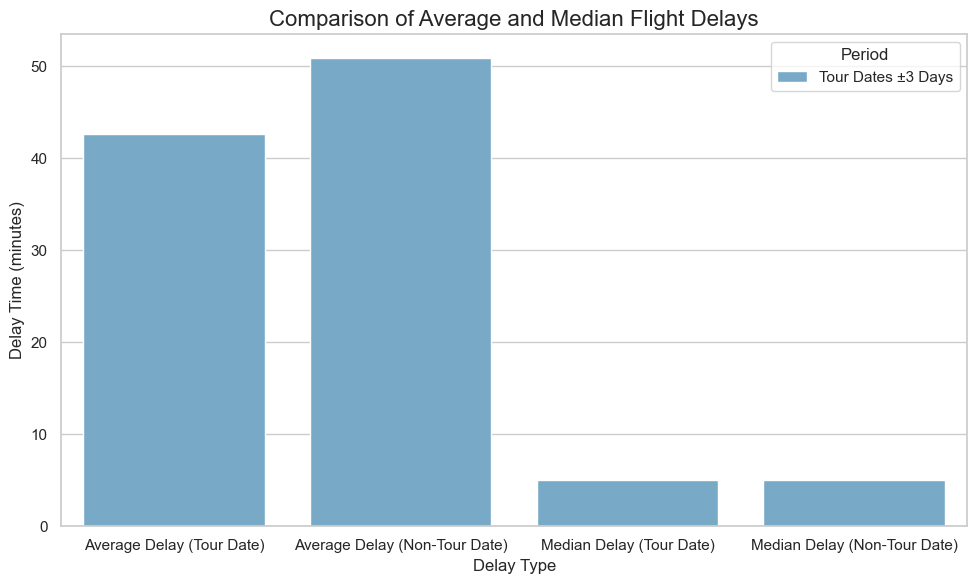

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot using matplotlib
plt.figure(figsize=(10, 6))

# Melt the DataFrame to long format for easier plotting
visualization_melted = visualization_df.melt(id_vars='Period', 
                                             value_vars=['Average Delay (Tour Date)', 'Average Delay (Non-Tour Date)', 
                                                         'Median Delay (Tour Date)', 'Median Delay (Non-Tour Date)'], 
                                             var_name='Delay Type', value_name='Delay Time')

# Plot the data
sns.barplot(x='Delay Type', y='Delay Time', hue='Period', data=visualization_melted, palette='Blues')

# Add labels and title
plt.title('Comparison of Average and Median Flight Delays', fontsize=16)
plt.xlabel('Delay Type', fontsize=12)
plt.ylabel('Delay Time (minutes)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
print(f"Data type of 'tour_flights[flight_delay_time]': {tour_flights['flight_delay_time'].dtype}")
print(f"Data type of 'non_tour_flights[flight_delay_time]': {non_tour_flights['flight_delay_time'].dtype}")


Data type of 'tour_flights[flight_delay_time]': float64
Data type of 'non_tour_flights[flight_delay_time]': float64


In [34]:
# Check for unique values and the distribution of delay times
print(f"Unique values in 'tour_flights[flight_delay_time]': {tour_flights['flight_delay_time'].unique()[:10]}")  # Show first 10 unique values
print(f"Unique values in 'non_tour_flights[flight_delay_time]': {non_tour_flights['flight_delay_time'].unique()[:10]}")  # Show first 10 unique values

# Check the range of values (min, max)
print(f"Range of 'tour_flights[flight_delay_time]': {tour_flights['flight_delay_time'].min()} to {tour_flights['flight_delay_time'].max()}")
print(f"Range of 'non_tour_flights[flight_delay_time]': {non_tour_flights['flight_delay_time'].min()} to {non_tour_flights['flight_delay_time'].max()}")


Unique values in 'tour_flights[flight_delay_time]': [ 0. 18.  9.  6. 24.  5. 11. 19.  8. 17.]
Unique values in 'non_tour_flights[flight_delay_time]': [31.  3.  0. 16. 15. 18.  4. 14. 12.  2.]
Range of 'tour_flights[flight_delay_time]': 0.0 to 1438.0
Range of 'non_tour_flights[flight_delay_time]': 0.0 to 1438.0


In [35]:

# Check if the column exists and if there are any NaN values
print(tour_flights['flight_delay_time'].isnull().sum())  # Check for NaNs in tour flights
print(non_tour_flights['flight_delay_time'].isnull().sum())  # Check for NaNs in non-tour flights




0
0


In [36]:
# Check the number of rows in both datasets
print(f"Tour flights: {len(tour_flights)}")
print(f"Non-tour flights: {len(non_tour_flights)}")


Tour flights: 32355
Non-tour flights: 4472104


In [37]:
# Check lengths of both datasets to ensure they are non-empty
print(f"Tour flights with delay data: {len(tour_flights)}")
print(f"Non-tour flights with delay data: {len(non_tour_flights)}")

# Check for missing values in the delay column for both tour and non-tour flights
print(f"Missing values in tour flights flight_delay_time: {tour_flights['flight_delay_time'].isna().sum()}")
print(f"Missing values in non-tour flights flight_delay_time: {non_tour_flights['flight_delay_time'].isna().sum()}")


Tour flights with delay data: 32355
Non-tour flights with delay data: 4472104
Missing values in tour flights flight_delay_time: 0
Missing values in non-tour flights flight_delay_time: 0


In [38]:
 non_tour_flights['flight_delay_time'].head()

0    31.0
1     3.0
2     0.0
3     0.0
4     0.0
Name: flight_delay_time, dtype: float64

In [39]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define the date range for filtering
start_date = '2023-05-01'
end_date = '2023-08-16'

# Filter the DataFrame to keep rows where 'eras_tour' is not 'non_tour' OR if 'non_tour' flights are within the date range
df_filtered_eras_dates = df[~((df['eras_tour'] == 'non_tour') & 
                              ((df['date'] < start_date) | (df['date'] > end_date)))]

# Ensure the filtered DataFrame is not None and has data
if df_filtered_eras_dates is not None and not df_filtered_eras_dates.empty:
    print("Filtered DataFrame is not None and has rows.")
    print(df_filtered_eras_dates.head())  # Preview the first few rows
else:
    print("The filtered DataFrame is empty or None.")


Filtered DataFrame is not None and has rows.
  day_of_week       date op_unique_carrier tail_num  op_carrier_fl_num  \
0      monday 2023-05-01                9e   n131ev               4888   
1      monday 2023-05-01                oo   n905ev               5331   
2      monday 2023-05-01                oo   n908ev               4761   
3      monday 2023-05-01                oo   n908ev               4761   
4      monday 2023-05-01                oo   n908ev               5529   

  origin_iata   origin_city dest_iata    dest_city  crs_dep_time  ...  \
0         cvg    cincinnati       msp  minneapolis           754  ...   
1         sbn    south bend       ord      chicago           460  ...   
2         psp  palm springs       lax  los angeles           524  ...   
3         psp  palm springs       lax  los angeles           524  ...   
4         lax   los angeles       rdd      redding           660  ...   

   delay_columns  latitude_dest  longitude_dest  elevation_dest  prcp_d

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\594269790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_eras_dates['date'] = pd.to_datetime(df['date'])
C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\594269790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_eras_dates['week_of_year'] = df_filtered_eras_dates['date'].dt.isocalendar().week


   week_of_year op_unique_carrier  eras_tour       mean  median
0            18                9e   non_tour   4.627083    10.0
1            18                aa   non_tour  39.922240     6.0
2            18                aa  tour_date  65.913043    12.0
3            18                as   non_tour  14.303758    10.0
4            18                as  tour_date  -0.833333     7.5


C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\594269790.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=weekly_airline_delays, x='week_of_year', y='mean', hue='eras_tour', palette='pastel', ci=None)


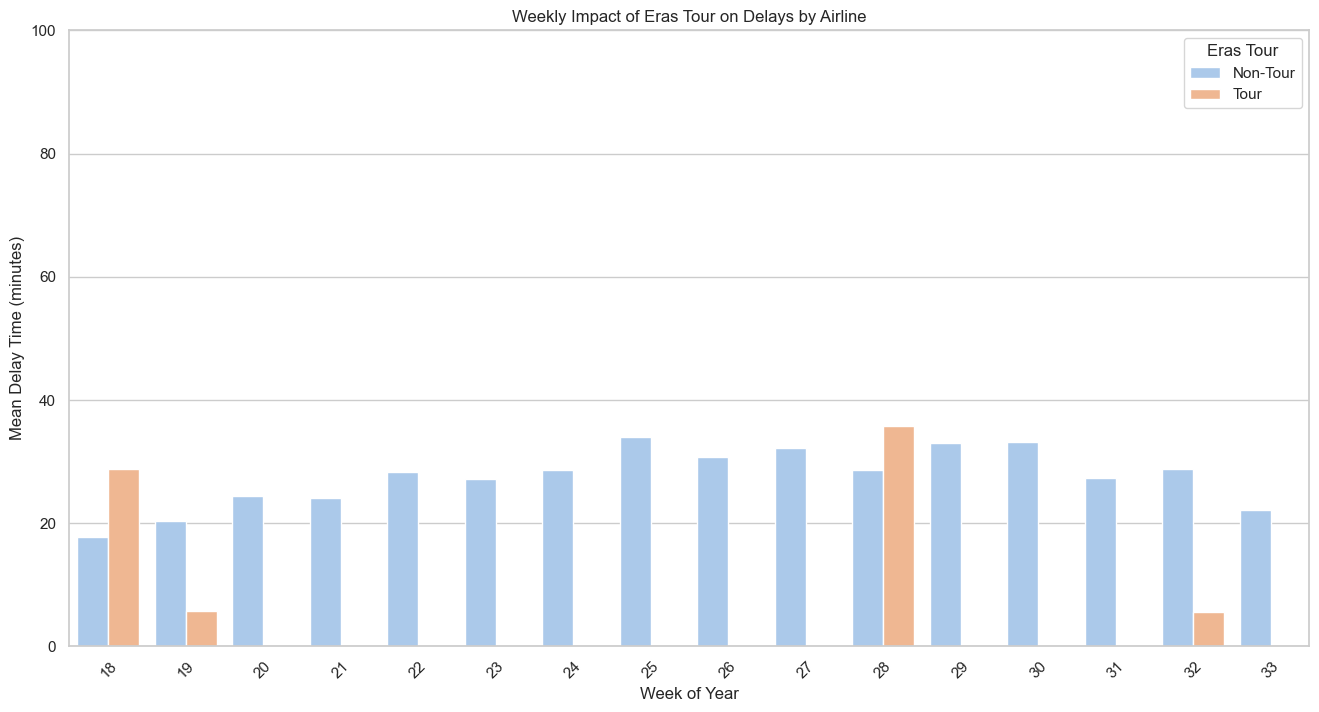

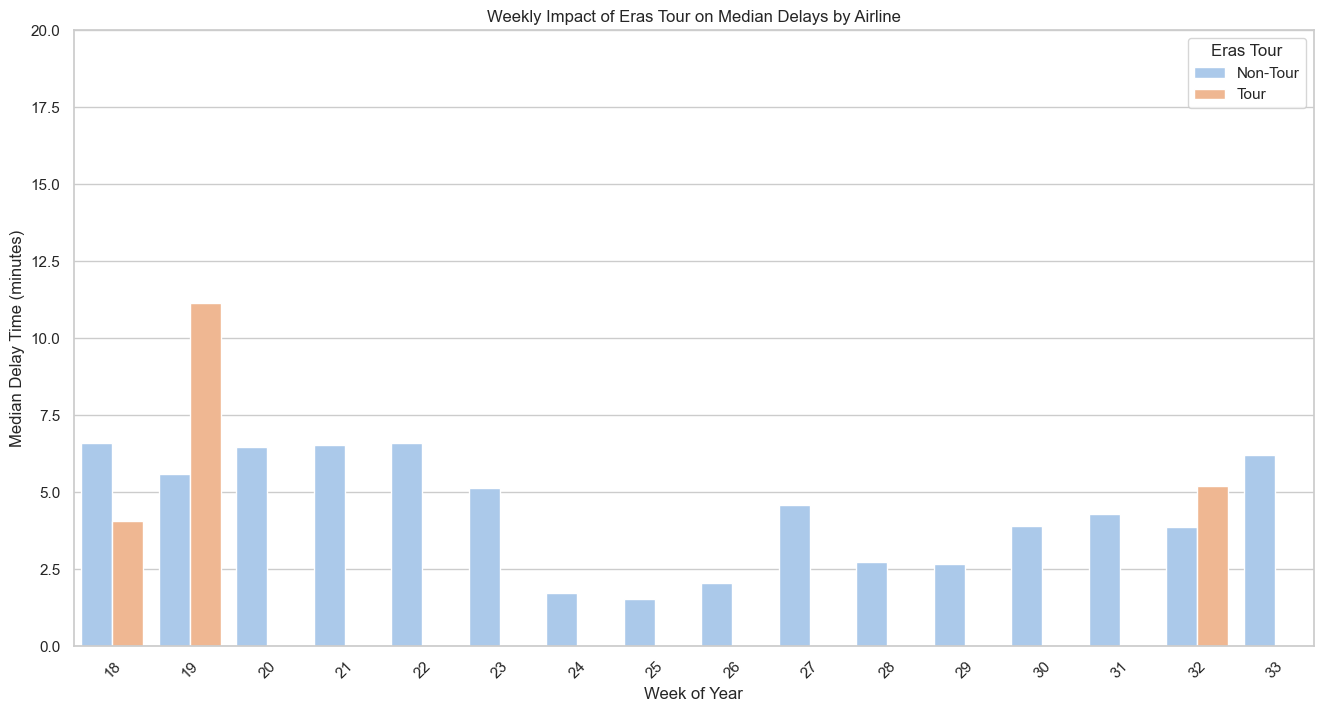

In [40]:
# Analyze impact of Eras Tour by airline
# Ensure 'flight_date' is in datetime format
df_filtered_eras_dates['date'] = pd.to_datetime(df['date'])

# Extract the week of the year from 'flight_date' and create a new column 'week_of_year'
df_filtered_eras_dates['week_of_year'] = df_filtered_eras_dates['date'].dt.isocalendar().week

# Group by week, airline, and tour status, then calculate mean and median delays
weekly_airline_delays = df_filtered_eras_dates.groupby(['week_of_year', 'op_unique_carrier', 'eras_tour'])['flight_delay_time'].agg(['mean', 'median']).reset_index()

# Check the aggregated data to ensure the grouping is correct
print(weekly_airline_delays.head())

# Visualize the results
plt.figure(figsize=(16, 8))

# Create a barplot for mean delays, with hue for 'eras_tour' (Tour vs Non-Tour)
sns.barplot(data=weekly_airline_delays, x='week_of_year', y='mean', hue='eras_tour', palette='pastel', ci=None)

# Customize the plot
plt.title('Weekly Impact of Eras Tour on Delays by Airline')
plt.xlabel('Week of Year')
plt.ylabel('Mean Delay Time (minutes)')
plt.legend(title='Eras Tour', labels=['Non-Tour', 'Tour'])
plt.xticks(rotation=45)
plt.ylim(0, 100) 
plt.show()

# Visualize the median delay time as well
plt.figure(figsize=(16, 8))
sns.barplot(data=weekly_airline_delays, x='week_of_year', y='median', hue='eras_tour', palette='pastel', errorbar=None)

# Customize the plot
plt.title('Weekly Impact of Eras Tour on Median Delays by Airline')
plt.xlabel('Week of Year')
plt.ylabel('Median Delay Time (minutes)')
plt.legend(title='Eras Tour', labels=['Non-Tour', 'Tour'])
plt.xticks(rotation=45)

# Zooming in on the y-axis by setting custom limits
plt.ylim(0, 20)  # Set the maximum y-value to 100 minutes (you can adjust this)


plt.show()


C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\2064624349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_impact, x='eras_tour', y='mean', palette='coolwarm')


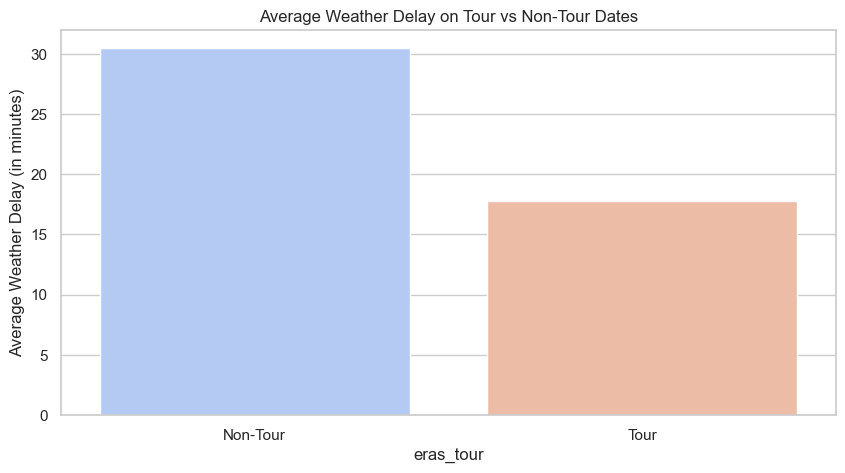

In [41]:


# Weather Analysis
# Assuming `weather_delay` indicates weather-related delays
weather_impact = df_filtered_eras_dates.groupby('eras_tour')['flight_delay_time'].agg(['mean', 'median', 'sum']).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=weather_impact, x='eras_tour', y='mean', palette='coolwarm')
plt.title('Average Weather Delay on Tour vs Non-Tour Dates')
plt.ylabel('Average Weather Delay (in minutes)')
plt.xticks(ticks=[0, 1], labels=['Non-Tour', 'Tour'])
plt.show()


C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\846581828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_eras_dates['date'] = pd.to_datetime(df_filtered_eras_dates['date'])
C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\846581828.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_filtered_eras_dates, x='date', y='flight_delay_time', hue='eras_tour', estimator='mean', ci=None)


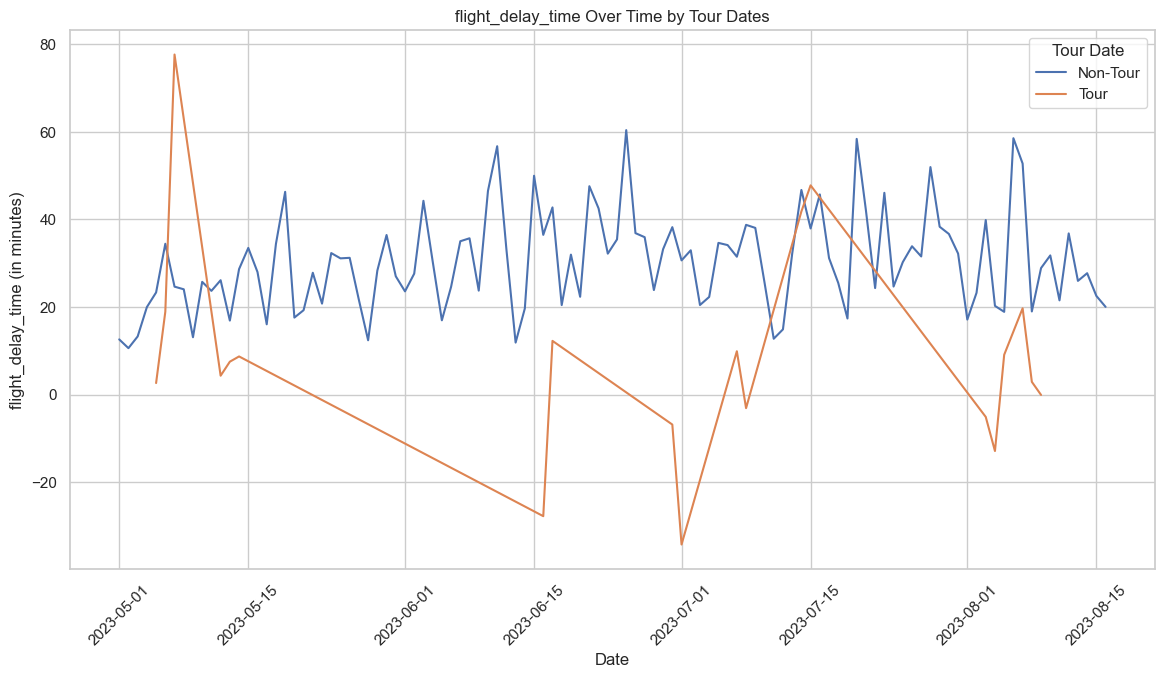

In [42]:

# Time Series Analysis

df_filtered_eras_dates['date'] = pd.to_datetime(df_filtered_eras_dates['date'])

# Plot adjusted delays over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered_eras_dates, x='date', y='flight_delay_time', hue='eras_tour', estimator='mean', ci=None)
plt.title('flight_delay_time Over Time by Tour Dates')
plt.ylabel('flight_delay_time (in minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Tour Date', labels=['Non-Tour', 'Tour'])
plt.show()


C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\3698600072.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=weekly_airline_delays,


Missing Weeks with No 'tour_date' Entries: [20, 21, 22, 23, 25, 29, 30, 33]


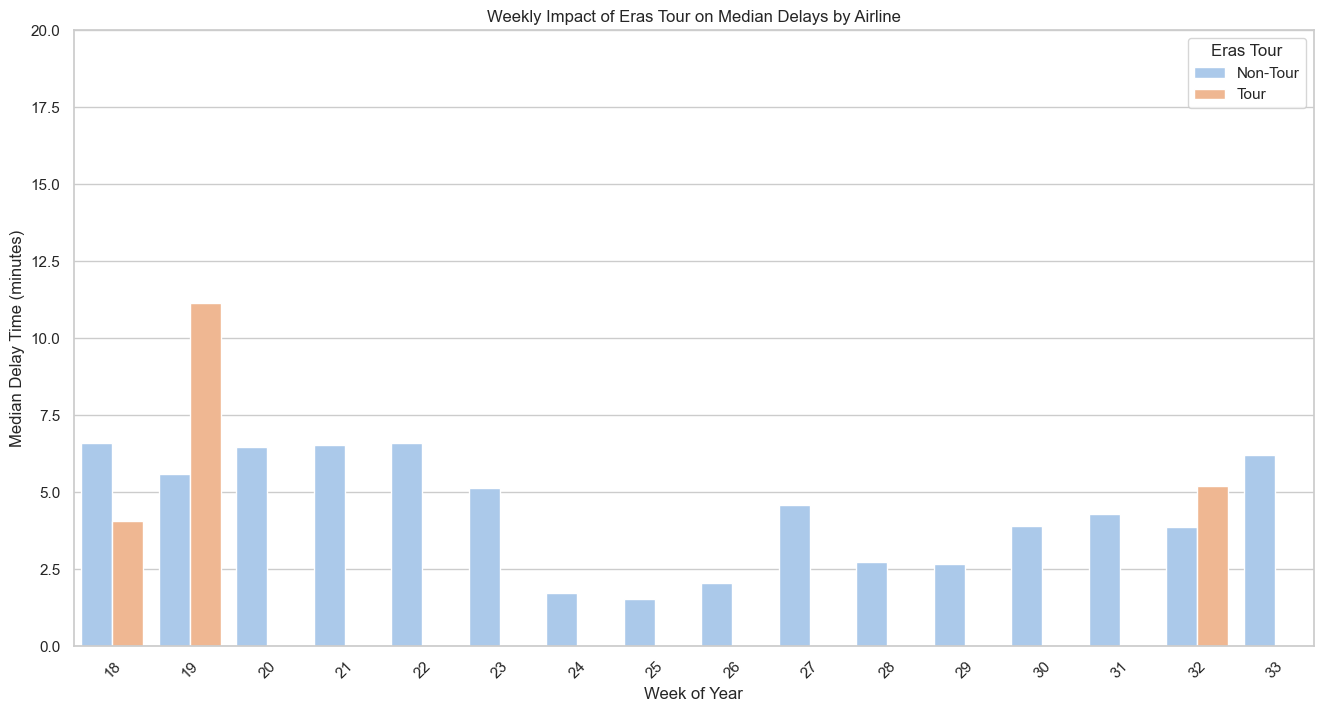

In [43]:
# Create a barplot for median delays, with hue for 'eras_tour' (Tour vs Non-Tour)
plt.figure(figsize=(16, 8))

# Create the bar plot for median delays, grouped by week_of_year and eras_tour (tour vs non-tour)
sns.barplot(data=weekly_airline_delays, 
            x='week_of_year', 
            y='median', 
            hue='eras_tour', 
            palette='pastel', 
            ci=None)

# Customize the plot title and axis labels
plt.title('Weekly Impact of Eras Tour on Median Delays by Airline')
plt.xlabel('Week of Year')
plt.ylabel('Median Delay Time (minutes)')
plt.legend(title='Eras Tour', labels=['Non-Tour', 'Tour'])
plt.xticks(rotation=45)
plt.ylim(0, 20)  # Adjust the y-axis range as needed

# Now, find the weeks with no 'tour_date' entries
# Group the data by 'week_of_year' and 'eras_tour' to check for missing weeks
weeks_with_tour = weekly_airline_delays[weekly_airline_delays['eras_tour'] == 'tour_date']['week_of_year'].unique()

# Get all the weeks in the dataset (from 1 to 52 or 53 depending on the year)
all_weeks = set(weekly_airline_delays['week_of_year'].unique())

# Determine the missing weeks (weeks with no 'tour_date')
missing_weeks = sorted(all_weeks - set(weeks_with_tour))

# Print missing weeks to check
print("Missing Weeks with No 'tour_date' Entries:", missing_weeks)

# Add annotations for weeks with no 'tour_date' data
for week in missing_weeks:
    plt.annotate(f'No Tour Data', 
                 xy=(week, 0),  # Place annotation at y=0 (or adjust based on y-limits)
                 xycoords='data', 
                 textcoords="offset points", 
                 xytext=(0, 15),  # Increase vertical offset to move annotation higher
                 ha='center', 
                 color='red', 
                 fontsize=12,  # Increase font size for visibility
                 fontweight='bold')

# Show the plot
plt.show()


In [44]:
print(tour_flights.shape)
print(non_tour_flights.shape)


(32355, 79)
(4472104, 79)


In [45]:
# Check min and max dates in the dataset
print("Min Date:", tour_flights['date'].min())
print("Max Date:", tour_flights['date'].max())

print("Min Date:", non_tour_flights['date'].min())
print("Max Date:", non_tour_flights['date'].max())

Min Date: 2023-05-05 00:00:00
Max Date: 2023-08-09 00:00:00
Min Date: 2023-05-01 00:00:00
Max Date: 2023-08-16 00:00:00


In [46]:
print(df_filtered_eras_dates['eras_tour'].unique())

['non_tour' 'tour_date']


In [47]:
# Count the number of non-tour flights based on airline 'op_carrier_fl_num'
non_tour_flight_count = non_tour_flights['op_carrier_fl_num'].count()
tour_flight_count = tour_flights['op_carrier_fl_num'].count()
# Print the result
print(f"Non-Tour Flight Count: {non_tour_flight_count}")
print(f"Tour Date Flight Count: {tour_flight_count}")

Non-Tour Flight Count: 4472104
Tour Date Flight Count: 32355


In [48]:
print(non_tour_flights.describe())
print(tour_flights.describe())


                                date  op_carrier_fl_num  crs_dep_time  \
count                        4472104       4.472104e+06  4.472104e+06   
mean   2023-06-24 03:04:10.461437696       2.268812e+03  8.243892e+02   
min              2023-05-01 00:00:00       1.000000e+00  1.000000e+00   
25%              2023-05-28 00:00:00       1.074000e+03  5.630000e+02   
50%              2023-06-24 00:00:00       2.037000e+03  8.160000e+02   
75%              2023-07-21 00:00:00       3.141000e+03  1.080000e+03   
max              2023-08-16 00:00:00       8.819000e+03  1.439000e+03   
std                              NaN       1.506854e+03  3.035613e+02   

           dep_time      taxi_out    wheels_off     wheels_on       taxi_in  \
count  4.472104e+06  4.472104e+06  4.472104e+06  4.472104e+06  4.472104e+06   
mean   8.253950e+02  1.689070e+01  1.374861e+03  1.445096e+03  8.171355e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    5.640000e+02  1.200

## Flight Delay Summary:
Non-Tour Flights:

Mean flight delay (flight_delay_time): ~50.9 minutes.
Standard deviation: ~228 minutes, indicating that while most flights are delayed by a moderate amount (mean of ~50 minutes), there are large variances and outliers (some flights are delayed by many hours).
Min: 0 minutes (indicating on-time flights).
Max: 1,438 minutes (~24 hours), which suggests some extreme delays (this could be due to cancellations or very long delays).
Median (50%): 5 minutes, which means that half of the flights in the dataset have delays of 5 minutes or less.
Eras Tour Flights:

Mean flight delay (flight_delay_time): ~42.6 minutes.
Standard deviation: ~203 minutes, which is a bit lower than the non-tour dataset, indicating less variance in the delays compared to the non-tour flights.
Min: 0 minutes (some flights were on time).
Max: 1,438 minutes (again, this could be from extreme cases like cancellations or delays due to major issues).
Median (50%): 5 minutes, which is similar to the non-tour flights, with half of the Eras Tour flights having a delay of 5 minutes or less.

Taxiing Times:
Non-Tour Flights:
Taxi-out: Mean of ~16.9 minutes, with a standard deviation of ~9.1 minutes. The maximum taxi-out time is 178 minutes, which could indicate significant delays on the ground before departure.
Taxi-in: Mean of ~8.2 minutes, with a standard deviation of ~7.1 minutes.
Eras Tour Flights:
Taxi-out: Mean of ~17.3 minutes, slightly higher than non-tour flights, but similar overall.
Taxi-in: Mean of ~8.1 minutes, very similar to non-tour flights.

Departure and Arrival Times:
Non-Tour Flights:
Scheduled Departure Time (crs_dep_time): The mean is about 824 minutes (around 13:44 or 1:44 PM). The standard deviation is ~302 minutes, indicating that departures occur at various times.
Actual Departure Time (dep_time): The mean is about 825 minutes, which is very close to the scheduled time, suggesting that departures are usually close to the scheduled times.
Scheduled Arrival Time (crs_arr_time): Mean is 909 minutes (around 3:09 PM), and the actual arrival time is very close (mean is 878 minutes or around 2:58 PM).
Eras Tour Flights:
Scheduled Departure Time: The mean is about 813 minutes (around 1:53 PM), and the standard deviation is ~313 minutes.
Actual Departure Time: The mean is about 807 minutes (around 1:47 PM), which is slightly earlier than the scheduled time.
Scheduled Arrival Time: The mean is about 890 minutes (around 2:50 PM), with the actual arrival time being very close at 873 minutes (around 2:53 PM).

Weather Variables:

Precipitation (prcp_dest):
Non-Tour Flights: Precipitation is very low (mean ~0.12 inches).
Eras Tour Flights: Precipitation is also low (mean ~0.08 inches).

These values suggest that weather conditions did not have a major impact on delays for either set of flights.
Temperature (tmax_dest and tmin_dest):
Non-Tour Flights: Mean maximum temperature ~83°F and minimum temperature ~64°F.
Eras Tour Flights: Mean maximum temperature ~87°F and minimum temperature ~66°F.
The temperatures are fairly typical for summer months, with only slight variation between the two datasets.

Interpretation:
Flight Delays: Both datasets show that flight delays, on average, are moderate (around 50 minutes for non-tour flights, and around 43 minutes for Eras Tour flights). The extreme maximum values (up to 24 hours) are likely outliers, possibly due to very rare or extreme events like cancellations or significant operational disruptions.

Taxiing Time: Both datasets show similar taxi-out times, with Eras Tour flights having a slightly higher average taxi-out time. However, the overall taxi-in times are very similar across both datasets.

Scheduled vs. Actual Times: The actual departure and arrival times for both sets of flights are very close to the scheduled times, with very minor delays on average. This suggests that, despite any delays, both the general flights and the Eras Tour flights operate on fairly predictable schedules.

Weather Impact: Both datasets show minimal impact from weather (low precipitation and typical temperatures), meaning weather disruptions likely had little effect on delays for both types of flights.

Key Conclusion:
There is not a significant difference in the delay patterns between the Eras Tour flights and non-tour flights. Both show similar mean delays (around 42-50 minutes) and comparable taxiing times, suggesting that the Eras Tour flights were not subject to abnormal delays compared to regular flights. Any large deviations in delay (such as the maximum delays) are likely due to rare or extreme events, not routine factors.

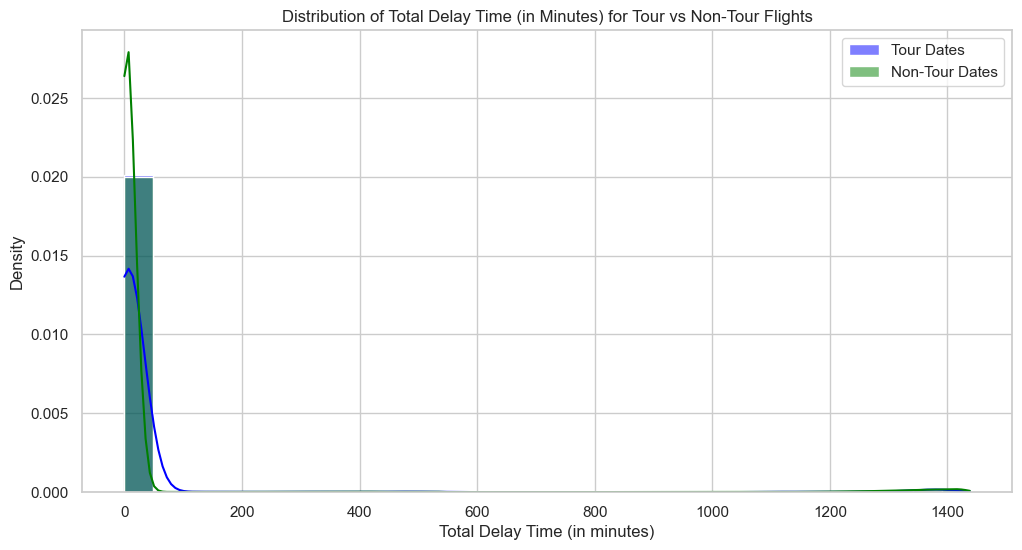

In [86]:
# Plot the distribution of flight_delay_time for tour and non-tour flights
plt.figure(figsize=(12, 6))

# Plot histograms for both groups
sns.histplot(tour_flights['flight_delay_time'].dropna(), bins=30, color='blue', kde=True, label='Tour Dates', stat='density')
sns.histplot(non_tour_flights['flight_delay_time'].dropna(), bins=30, color='green', kde=True, label='Non-Tour Dates', stat='density')

# Add labels and title
plt.title('Distribution of Total Delay Time (in Minutes) for Tour vs Non-Tour Flights')
plt.xlabel('Total Delay Time (in minutes)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


In [87]:
#Check for missing values and their distribution:
missing_values = df_filtered_eras_dates.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [88]:
df_filtered_eras_dates.columns


Index(['Unnamed: 0', 'day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'eras_tour', 'nfl_game', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of

In [52]:
# SAVE FILE
df_filtered_eras_dates = df_filtered_eras_dates.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\final_combined_data2_preprocessing2erasdates.csv')

In [53]:
# Load data
df = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\final_combined_data2_preprocessing2erasdates.csv')

In [54]:
df_filtered_eras_dates = df

In [55]:
df_filtered_eras_dates.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'eras_tour', 'nfl_game', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of

In [56]:
# View unique values in the 'nfl_game' column
print(df_filtered_eras_dates['nfl_game'].unique())


['no']


In [57]:
df_filtered_eras_dates.head()

,Unnamed: 0,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,...,le_ident,le_displaced_threshold_ft,he_ident,he_displaced_threshold_ft,eras_tour,nfl_game,delay_columns,total_delay_time,flight_delay_time,week_of_year
0,0,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,...,09,0.0,27,0.0,non_tour,no,0.0,31.0,31.0,18
1,1,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,...,18c,0.0,36c,0.0,non_tour,no,0.0,31.0,31.0,18
2,2,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,...,18l,0.0,36r,0.0,non_tour,no,0.0,31.0,31.0,18
3,3,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,...,18r,0.0,36l,0.0,non_tour,no,0.0,31.0,31.0,18
4,4,1,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,...,05,0.0,23,0.0,non_tour,no,0.0,51.0,51.0,18


In [58]:
df_filtered_eras_dates.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'eras_tour', 'nfl_game', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of

In [59]:
# Check the data type of the 'nfl_game' column
print(df_filtered_eras_dates['nfl_game'].dtype)


object


In [60]:
# Check the shape and data types
print(df_filtered_eras_dates.shape)
print(df_filtered_eras_dates.dtypes)

# Display summary statistics
print(df_filtered_eras_dates.describe(include='all'))

# Check the data type of the column
print("Data type of 'eras_tour':", df_filtered_eras_dates['eras_tour'].dtype)

# Print unique values to see what they look like
print("Unique values in 'eras_tour':", df_filtered_eras_dates['eras_tour'].unique())


(4496511, 59)
Unnamed: 0                     int64
day_of_week                    int64
date                          object
op_unique_carrier             object
tail_num                      object
op_carrier_fl_num              int64
origin_iata                   object
origin_city                   object
dest_iata                     object
dest_city                     object
crs_dep_time                   int64
dep_time                     float64
taxi_out                     float64
wheels_off                   float64
wheels_on                    float64
taxi_in                      float64
crs_arr_time                   int64
arr_time                     float64
cancelled                    float64
diverted                     float64
crs_elapsed_time             float64
actual_elapsed_time          float64
air_time                     float64
flights                      float64
distance                     float64
distance_group                 int64
carrier_delay           

In [61]:
#Check for missing values and their distribution:
missing_values = df_filtered_eras_dates.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [62]:
# Check if 'date' is already in datetime format
if df_filtered_eras_dates['date'].dtype == 'object':
    # Convert 'date' to datetime format
    df_filtered_eras_dates['date'] = pd.to_datetime(df_filtered_eras_dates['date'])

# Filter rows where 'eras_tour' is 'tour_date'
tour_dates = df_filtered_eras_dates[df_filtered_eras_dates['eras_tour'] == 'tour_date']

# Ensure 'nfl_game' is a string column, then filter rows where 'nfl_game' contains 'game_day'
df_filtered_eras_dates['nfl_game'] = df_filtered_eras_dates['nfl_game'].astype(str)  # Convert to string if not already
game_day_df = df_filtered_eras_dates[df_filtered_eras_dates['nfl_game'].str.contains('game_day', na=False)]

# Get the unique dates for the tour dates rows
unique_tour_dates = tour_dates['date'].unique()

# Print the filtered tour dates dataframe
print(tour_dates.head())

# Print the unique tour dates
print(unique_tour_dates)




        Unnamed: 0  day_of_week       date op_unique_carrier tail_num  \
162735      162735            5 2023-05-05                aa   n110uw   
162736      162736            5 2023-05-05                aa   n110uw   
162737      162737            5 2023-05-05                aa   n110uw   
162738      162738            5 2023-05-05                aa   n110uw   
163006      163006            5 2023-05-05                aa   n128an   

        op_carrier_fl_num origin_iata origin_city dest_iata  \
162735                789         bna   nashville       clt   
162736                789         bna   nashville       clt   
162737                789         bna   nashville       clt   
162738                789         bna   nashville       clt   
163006               1100         bna   nashville       dfw   

                dest_city  ...  le_ident  le_displaced_threshold_ft  he_ident  \
162735          charlotte  ...       02c                      455.0       20c   
162736          char

In [63]:
# View unique values in the 'nfl_game' column
print(df['nfl_game'].unique())


['no']


In [64]:
tour_dates.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'eras_tour', 'nfl_game', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of

In [65]:

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter rows where 'eras_tour' is 'tour_date'
tour_dates = df[df['eras_tour'] == 'tour_date']['date']

# Create a list to hold the date ranges
date_ranges = []

# Loop through each tour date to create the date ranges
for tour_date in tour_dates:
    # Create a date range for ±3 days around each tour date
    start_date = tour_date - pd.DateOffset(days=3)
    end_date = tour_date + pd.DateOffset(days=3)
    date_ranges.append((start_date, end_date))

# Print the date ranges
for start, end in date_ranges:
    print(f"Start: {start.date()}, End: {end.date()}")


Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, End: 2023-05-08
Start: 2023-05-02, E

In [66]:
print(df[['arr_time', 'crs_arr_time']])

         arr_time  crs_arr_time
0          1310.0          1341
1          1310.0          1341
2          1310.0          1341
3          1310.0          1341
4          1854.0          1905
...           ...           ...
4496506    1614.0          1604
4496507    1010.0          1015
4496508    1010.0          1015
4496509    1010.0          1015
4496510    1010.0          1015

[4496511 rows x 2 columns]


In [67]:
# Feature Engineering

# Ensure the 'arr_time' and 'crs_arr_time' are in the proper datetime format 
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], errors='coerce')

# Calculate the delay time in minutes
df['delay_time_min'] = (df['arr_time'] - df['crs_arr_time']).dt.total_seconds() / 60

# Replace any negative or zero delay with 0 (early or on-time)
df['delay_time_min'] = np.where(df['delay_time_min'] > 0, df['delay_time_min'], 0)

# Show the result
print(df[['date','arr_time', 'arr_time', 'delay_time_min']].head(-10))


              date                      arr_time  \
0       2023-05-01 1970-01-01 00:00:00.000001310   
1       2023-05-01 1970-01-01 00:00:00.000001310   
2       2023-05-01 1970-01-01 00:00:00.000001310   
3       2023-05-01 1970-01-01 00:00:00.000001310   
4       2023-05-01 1970-01-01 00:00:00.000001854   
...            ...                           ...   
4496496 2023-08-16 1970-01-01 00:00:00.000001845   
4496497 2023-08-16 1970-01-01 00:00:00.000001845   
4496498 2023-08-16 1970-01-01 00:00:00.000002057   
4496499 2023-08-16 1970-01-01 00:00:00.000002057   
4496500 2023-08-16 1970-01-01 00:00:00.000002308   

                             arr_time  delay_time_min  
0       1970-01-01 00:00:00.000001310             0.0  
1       1970-01-01 00:00:00.000001310             0.0  
2       1970-01-01 00:00:00.000001310             0.0  
3       1970-01-01 00:00:00.000001310             0.0  
4       1970-01-01 00:00:00.000001854             0.0  
...                               ...  

In [68]:

# Convert 'arr_time' and 'crs_arr_time' to datetime format, with coercion for invalid parsing
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], errors='coerce')

# Verify the conversion (check for any NaT values in case of invalid data)
print(df[['arr_time', 'crs_arr_time']].head())


                       arr_time                  crs_arr_time
0 1970-01-01 00:00:00.000001310 1970-01-01 00:00:00.000001341
1 1970-01-01 00:00:00.000001310 1970-01-01 00:00:00.000001341
2 1970-01-01 00:00:00.000001310 1970-01-01 00:00:00.000001341
3 1970-01-01 00:00:00.000001310 1970-01-01 00:00:00.000001341
4 1970-01-01 00:00:00.000001854 1970-01-01 00:00:00.000001905


In [69]:
# Extract the time in HHMM format for both arr_time and crs_arr_time columns
df['arr_time_HHMM'] = df['arr_time'].dt.strftime('%H%M')
df['crs_arr_time_HHMM'] = df['crs_arr_time'].dt.strftime('%H%M')

# Verify the result
print(df[['arr_time_HHMM', 'crs_arr_time_HHMM']].head())


  arr_time_HHMM crs_arr_time_HHMM
0          0000              0000
1          0000              0000
2          0000              0000
3          0000              0000
4          0000              0000


In [70]:
# Replace NaT or invalid values with not_recorded
df['arr_time_HHMM'] = df['arr_time_HHMM'].fillna('not_recorded')
df['crs_arr_time_HHMM'] = df['crs_arr_time_HHMM'].fillna('not_recorded')

# Verify the result
print(df[['arr_time_HHMM', 'crs_arr_time_HHMM']].head())


  arr_time_HHMM crs_arr_time_HHMM
0          0000              0000
1          0000              0000
2          0000              0000
3          0000              0000
4          0000              0000


In [71]:
# Show the result
print(df[['arr_time_HHMM', 'crs_arr_time_HHMM', 'delay_time_min']].head(-10))

        arr_time_HHMM crs_arr_time_HHMM  delay_time_min
0                0000              0000             0.0
1                0000              0000             0.0
2                0000              0000             0.0
3                0000              0000             0.0
4                0000              0000             0.0
...               ...               ...             ...
4496496          0000              0000             0.0
4496497          0000              0000             0.0
4496498          0000              0000             0.0
4496499          0000              0000             0.0
4496500          0000              0000             0.0

[4496501 rows x 3 columns]


In [72]:
# Create the new column 'delay_in_min'
df['delay_in_min'] = df['flight_delay_time'].apply(lambda x: x if x > 0 else 0)

print(df.head())


   Unnamed: 0  day_of_week       date op_unique_carrier tail_num  \
0           0            1 2023-05-01                9e   n131ev   
1           1            1 2023-05-01                9e   n131ev   
2           2            1 2023-05-01                9e   n131ev   
3           3            1 2023-05-01                9e   n131ev   
4           4            1 2023-05-01                9e   n131ev   

   op_carrier_fl_num origin_iata origin_city dest_iata    dest_city  ...  \
0               4888         cvg  cincinnati       msp  minneapolis  ...   
1               4888         cvg  cincinnati       msp  minneapolis  ...   
2               4888         cvg  cincinnati       msp  minneapolis  ...   
3               4888         cvg  cincinnati       msp  minneapolis  ...   
4               5128         dsm  des moines       msp  minneapolis  ...   

   eras_tour  nfl_game  delay_columns  total_delay_time  flight_delay_time  \
0   non_tour        no            0.0              31.0 

In [73]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'eras_tour', 'nfl_game', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of

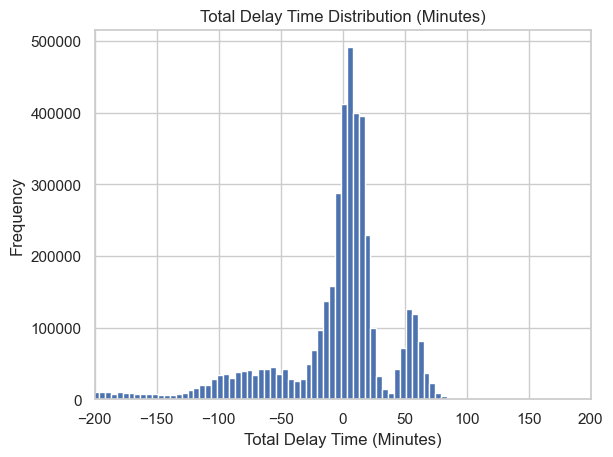

In [74]:
df['flight_delay_time'].hist(bins=1000)
plt.title('Total Delay Time Distribution (Minutes)')
plt.xlabel('Total Delay Time (Minutes)' )
plt.ylabel('Frequency')

# Set x-axis limits to zoom in (adjust values as needed)
plt.xlim(-200, 200)  # Change these values based on data distribution

plt.show()


In [75]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'eras_tour', 'nfl_game', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of

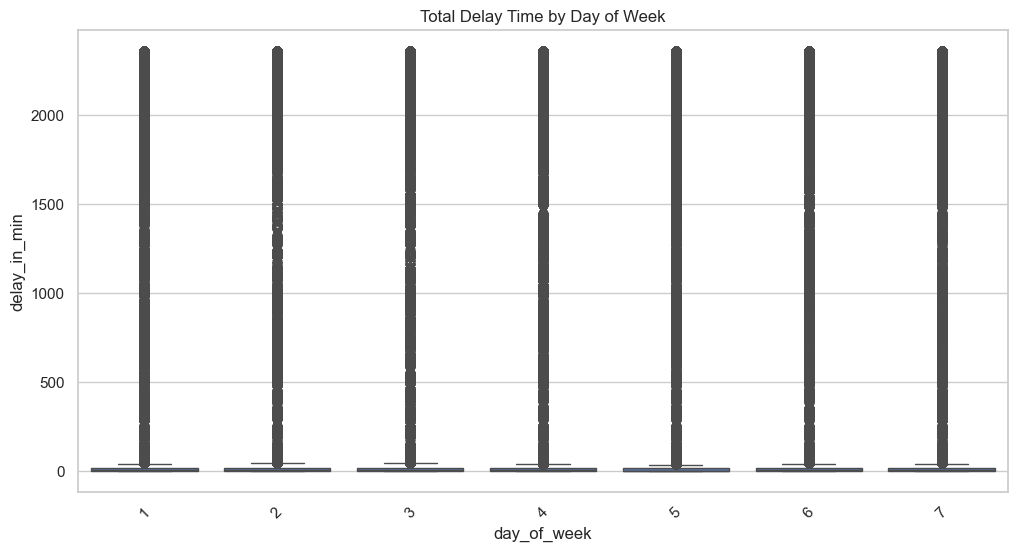

In [76]:
#Box plots to identify outliers:
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.boxplot(x='day_of_week', y='delay_in_min', data=df)
plt.title('Total Delay Time by Day of Week')
plt.xticks(rotation=45)
plt.show()

In [77]:
# Compare tour date metrics to non-tour date metrics

Average Delay Comparison:

Tour Dates: The average delay for flights around the tour dates (±3 days) is 80.46 minutes, which is significantly higher than the average delay for non-tour flights. Non-Tour Dates: The average delay for flights on non-tour dates is 63.34 minutes. This suggests that flights around tour dates tend to experience longer delays on average compared to non-tour flights. This could be due to a variety of factors such as higher traffic, operational constraints, or specific scheduling issues around tour dates.

Median Delay Comparison:

The median delay for both tour and non-tour flights is relatively close: 6 minutes for tour dates and 7 minutes for non-tour dates. This suggests that the central tendency (or the "typical" delay) is similar across both types of flights, but the average delay is higher for tour dates because of some larger delays (likely outliers).

In [79]:
df['delay_in_min'].mean()

84.36605892880057

In [80]:
df['delay_in_min'].median()


5.0

In [81]:
# 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# create additional features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [82]:
print(df.isnull().sum())

Unnamed: 0           0
day_of_week          0
date                 0
op_unique_carrier    0
tail_num             0
                    ..
crs_arr_time_HHMM    0
delay_in_min         0
year                 0
month                0
day                  0
Length: 66, dtype: int64


In [104]:
tour_delay_df = df.groupby(['op_carrier_fl_num', 'day_of_week'])['delay_in_min'].agg(['sum', 'count']).reset_index()

In [108]:
tour_delay_df.columns

Index(['op_carrier_fl_num', 'day_of_week', 'sum', 'count'], dtype='object')

In [116]:
print(tour_delay_df.head())

   op_carrier_fl_num  day_of_week      sum  count
0                  1            1   8432.0    204
1                  1            2   8388.0    203
2                  1            3  22376.0    206
3                  1            4   1072.0    196
4                  1            5   1351.0    192


In [118]:
# Group by 'op_carrier_fl_num' and 'day_of_week' and calculate the sum and count of delays
delay_and_count = tour_delay_df.groupby(['op_carrier_fl_num', 'day_of_week'])['sum'].agg(['sum', 'count']).reset_index()

In [124]:

# Calculate the average delay per flight by dividing the sum of delays by the count of flights
delay_and_count['average_delay_per_flight'] = delay_and_count['sum'] / delay_and_count['count']


In [126]:
# Merge the calculated average delay back to the original DataFrame
tour_delay_df = pd.merge(tour_delay_df, delay_and_count[['op_carrier_fl_num', 'day_of_week', 'average_delay_per_flight']], 
                          on=['op_carrier_fl_num', 'day_of_week'], how='left')


In [140]:

# 
print(tour_delay_df[[ 'op_carrier_fl_num', 'day_of_week', 'sum', 'average_delay_per_flight']].head())


   op_carrier_fl_num  day_of_week      sum  average_delay_per_flight
0                  1            1   8432.0                    8432.0
1                  1            2   8388.0                    8388.0
2                  1            3  22376.0                   22376.0
3                  1            4   1072.0                    1072.0
4                  1            5   1351.0                    1351.0


In [144]:

# Group by 'op_carrier_fl_num' and 'day_of_week' to calculate the total delay and count of flights
delay_and_count = df.groupby(['op_carrier_fl_num', 'day_of_week'])['delay_in_min'].agg(['sum', 'count']).reset_index()


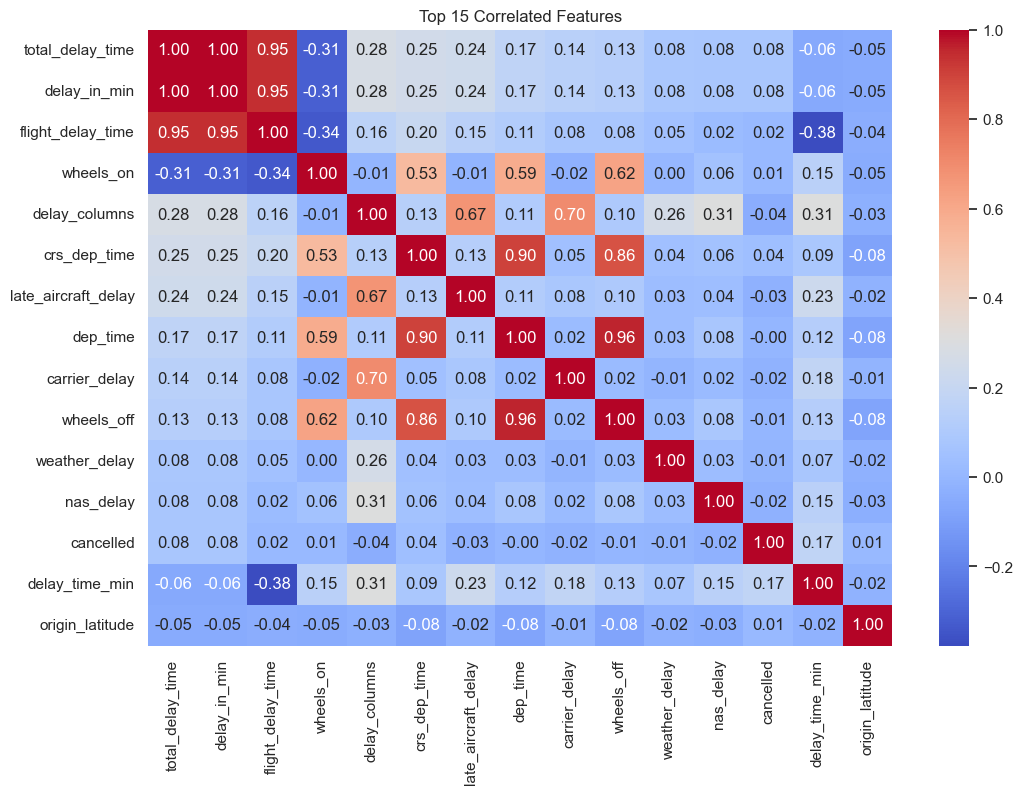

In [146]:
# Heatmap for numeric correlation

correlation_matrix = df.corr(numeric_only=True)

#  name of target column
target_corr = correlation_matrix['delay_in_min'].abs().sort_values(ascending=False)

# Select top 15 features (including the target)
top_features = target_corr.head(15).index

# Filter the correlation matrix for the top features
filtered_corr_matrix = correlation_matrix.loc[top_features, top_features]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Top 15 Correlated Features')
plt.show()


In [147]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['op_unique_carrier', 'tail_num', 'origin_iata', 'origin_city', 'dest_iata', 'dest_city', 'origin_state', 'dest_state', 'type_of_airport', 'airport_name', 'scheduled_service', 'surface', 'le_ident', 'he_ident', 'eras_tour', 'nfl_game', 'arr_time_HHMM', 'crs_arr_time_HHMM']


C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


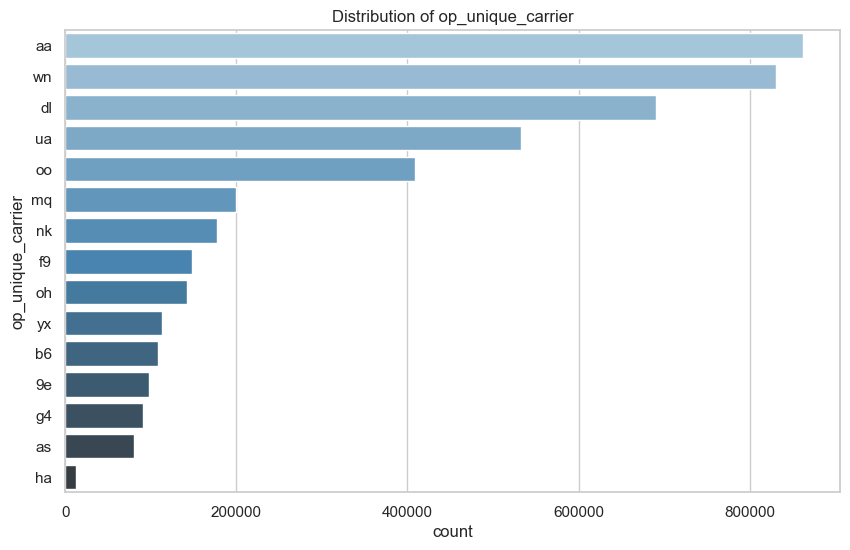

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


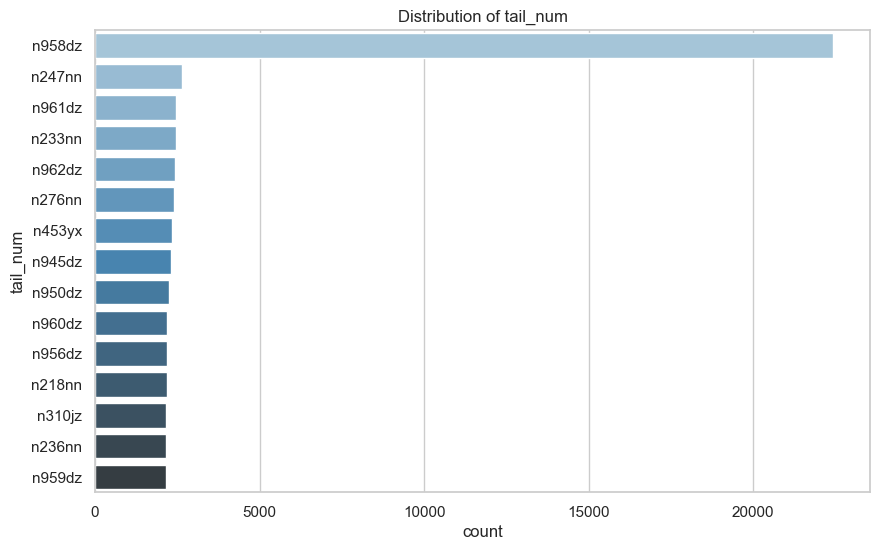

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


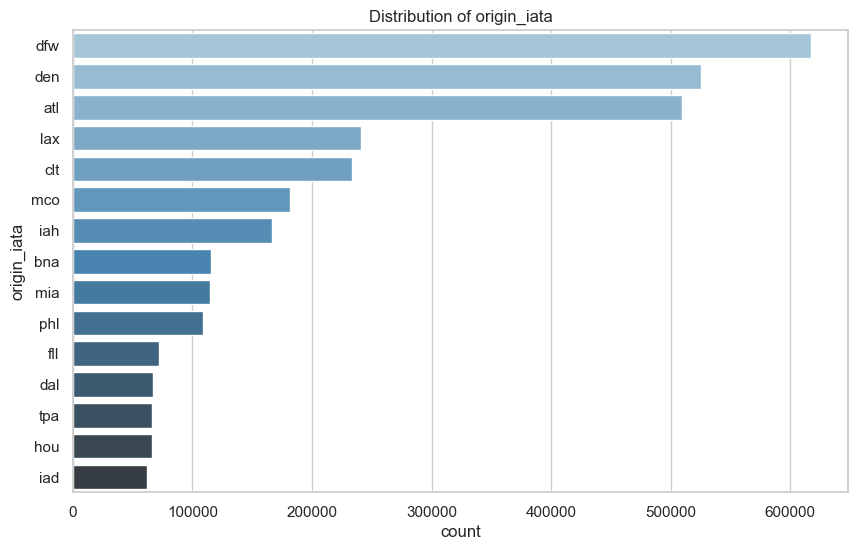

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


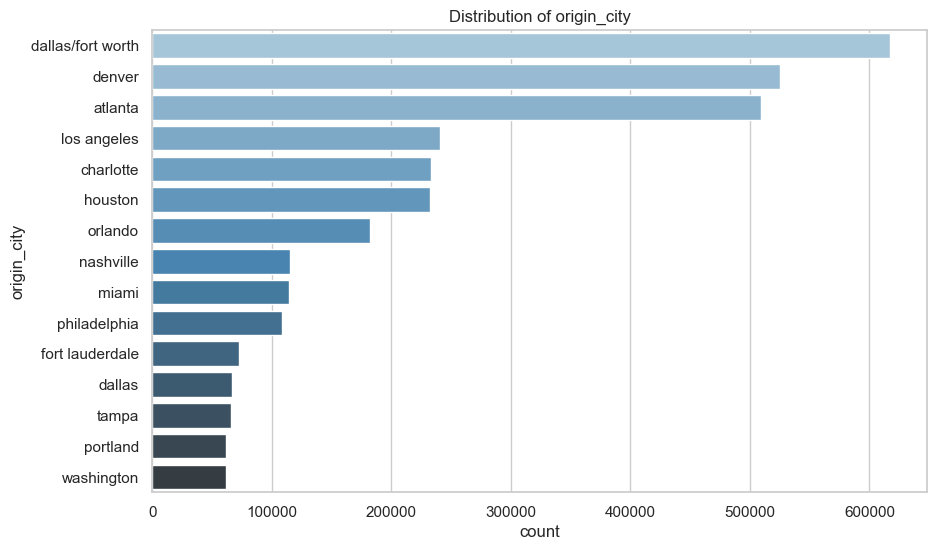

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


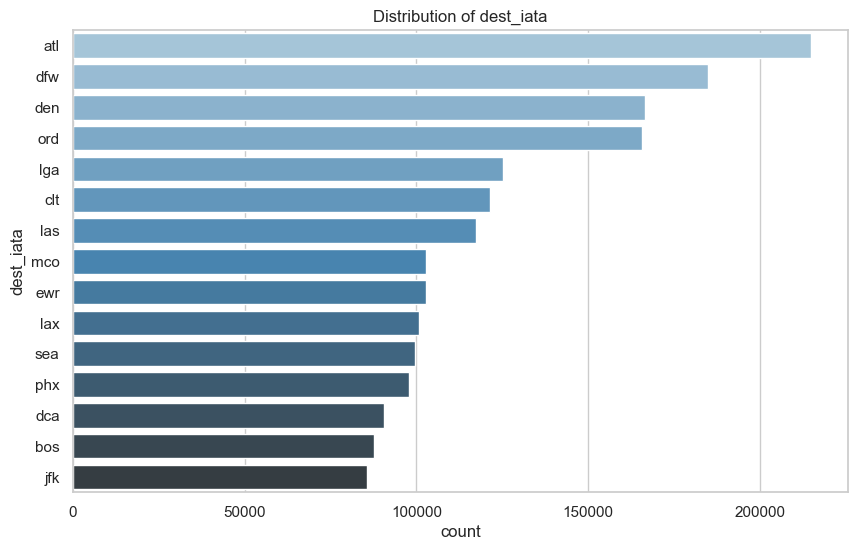

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


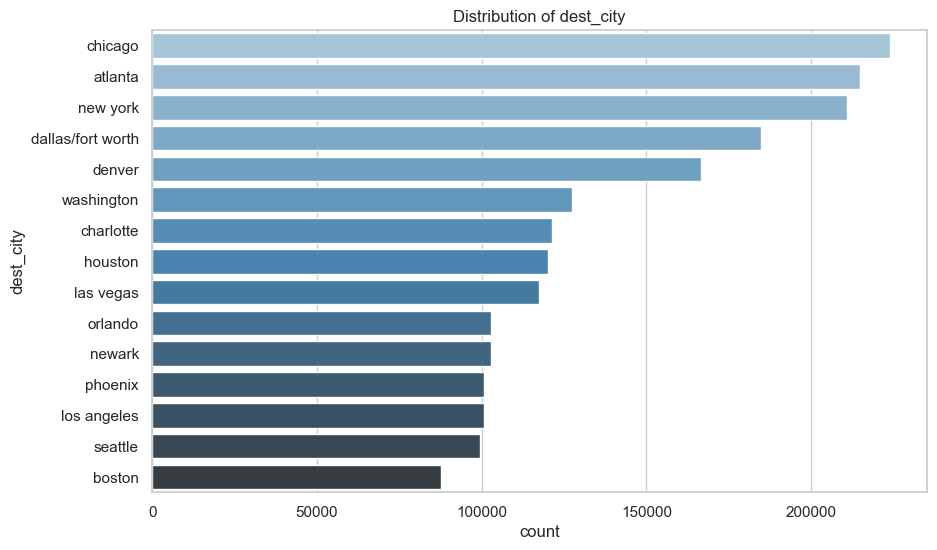

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


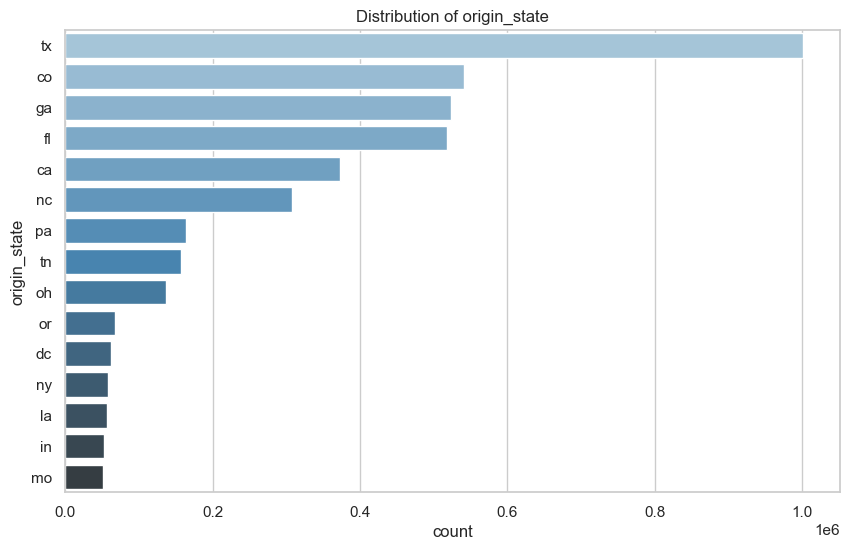

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


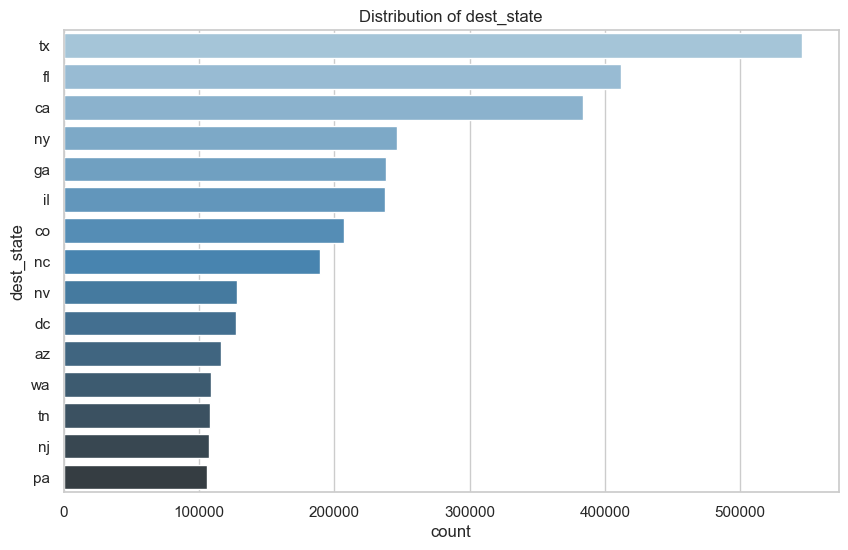

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


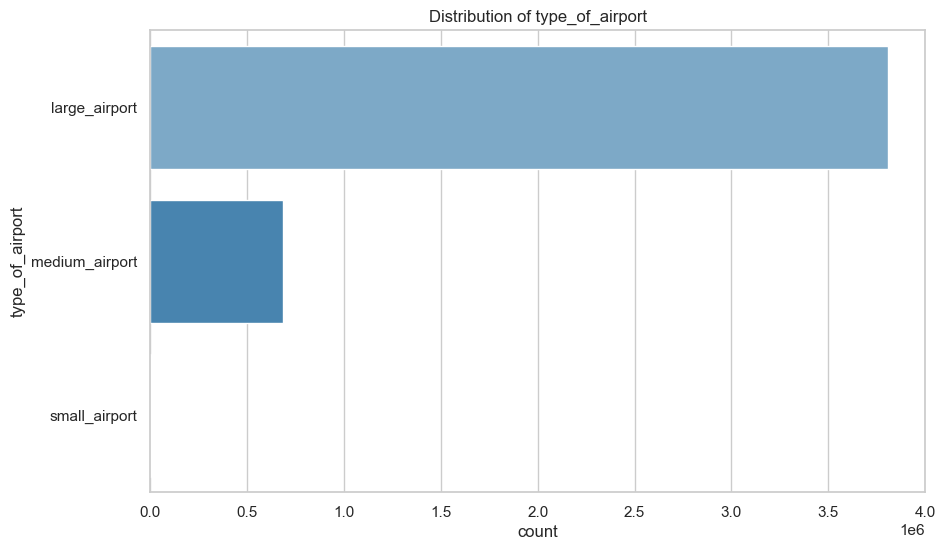

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


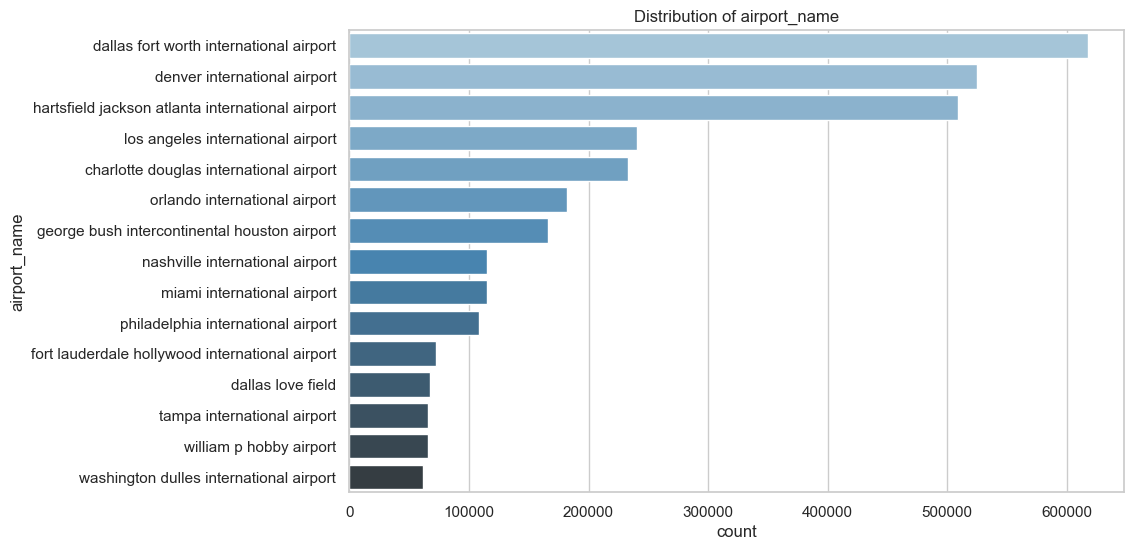

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


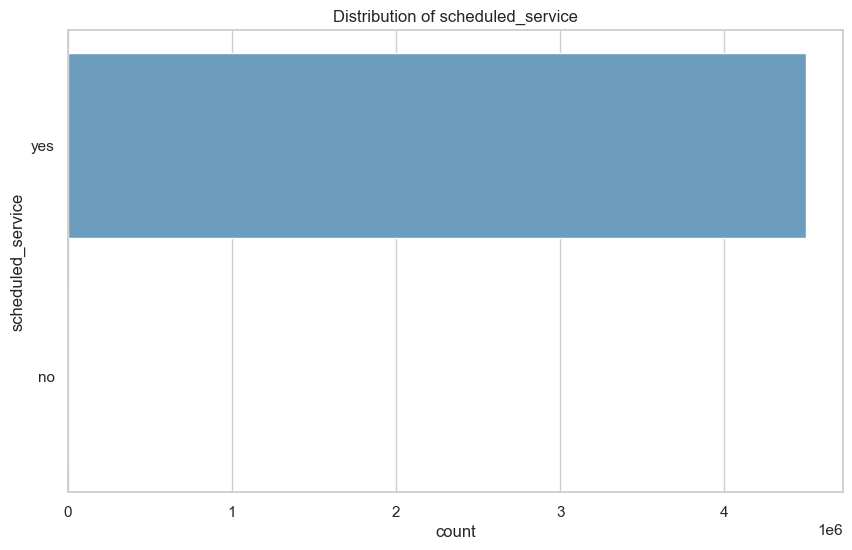

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


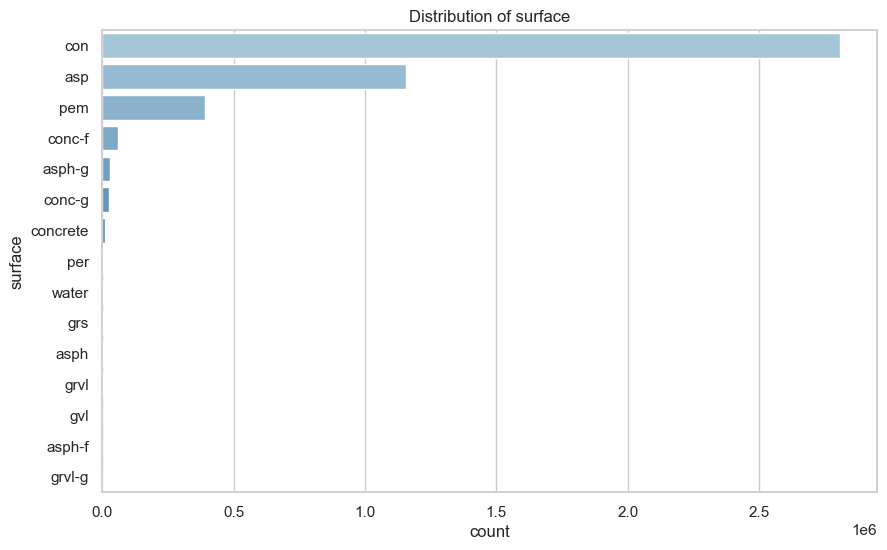

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


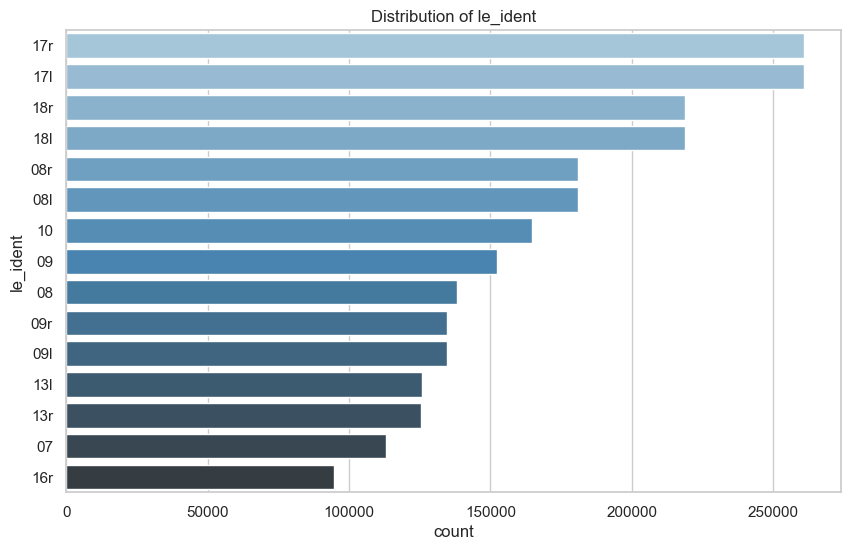

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


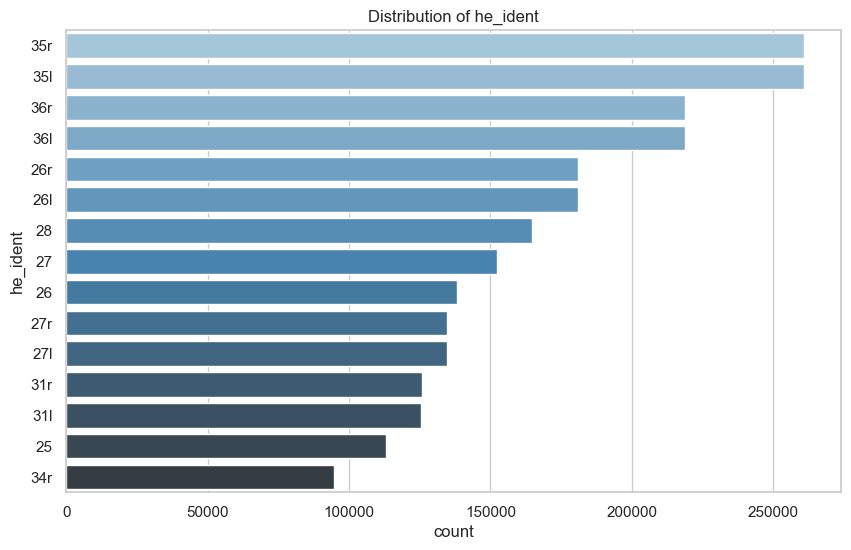

C:\Users\hopeh\AppData\Local\Temp\ipykernel_8216\469709610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")


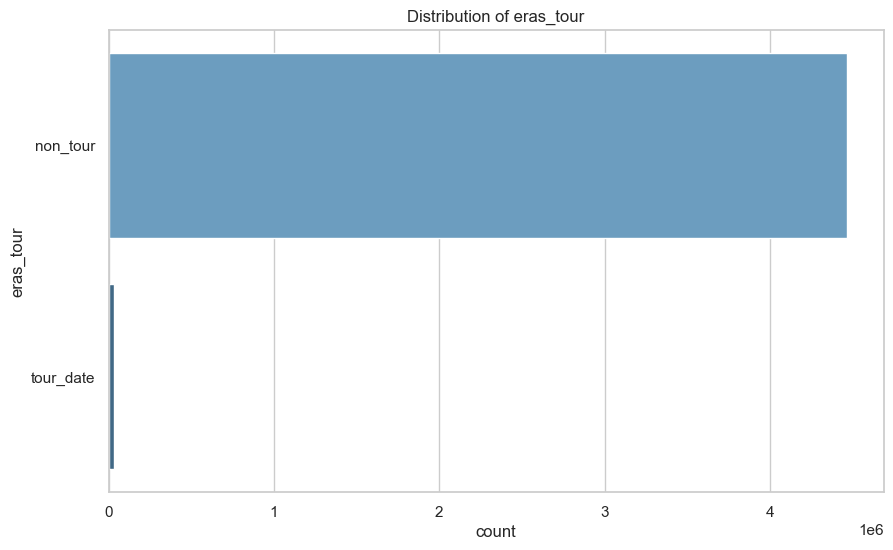

In [150]:


# Convert to category data type for each column in categorical_cols
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Create a dictionary to store the counts of each categorical feature
feature_counts = {col: df[col].value_counts().sum() for col in categorical_cols}

# Sort the features by count and get the top 15
top_features = sorted(feature_counts, key=feature_counts.get, reverse=True)[:15]

# Plot the distribution of the top 15 most frequent features
for col in top_features:
    # Get the top 15 most frequent values for each categorical feature
    top_categories = df[col].value_counts().nlargest(15).index
    
    # Plot only the top 15 categories on the y-axis
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=top_categories, palette="Blues_d")
    plt.title(f'Distribution of {col}')
    plt.show()


In [151]:
# Magnitude Standardization
# Assuming df is your DataFrame
scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [152]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'eras_tour', 'nfl_game', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of

In [168]:
df['nfl_game'].head()

0    no
1    no
2    no
3    no
4    no
Name: nfl_game, dtype: category
Categories (1, object): ['no']

In [170]:
#Create More Relevant Features

# identify how specific events (like tour dates and NFL game days)
# and delays affect flight delays.

df['is_tour_date'] = df['eras_tour'].apply(lambda x: 1 if x == 'tour_date' else 0)
df['is_nfl_game_day'] = df['nfl_game'].isin(df) | df['dest_iata'].isin(df['origin_iata'])


In [172]:

# Filter rows where nfl_game contains the string 'game_day'
game_day_df = df[df['is_nfl_game_day'] == True]
game_day_df.head()


,Unnamed: 0,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,...,week_of_year,delay_time_min,arr_time_HHMM,crs_arr_time_HHMM,delay_in_min,year,month,day,is_tour_date,is_nfl_game_day
22,-1.732033,-1.465133,2023-05-01,9e,n134ev,1.674021,cho,charlottesville,atl,atlanta,...,-1.646284,-0.257886,0000,0000,-0.198595,0.0,-1.272476,-1.577464,0,True
47,-1.732014,-1.465133,2023-05-01,9e,n146pq,1.596985,atl,atlanta,tys,knoxville,...,-1.646284,-0.257886,0000,0000,-0.087922,0.0,-1.272476,-1.577464,0,True
48,-1.732013,-1.465133,2023-05-01,9e,n146pq,1.596985,atl,atlanta,tys,knoxville,...,-1.646284,-0.257886,0000,0000,-0.087922,0.0,-1.272476,-1.577464,0,True
49,-1.732013,-1.465133,2023-05-01,9e,n146pq,1.596985,atl,atlanta,tys,knoxville,...,-1.646284,-0.257886,0000,0000,-0.087922,0.0,-1.272476,-1.577464,0,True
50,-1.732012,-1.465133,2023-05-01,9e,n146pq,1.596985,atl,atlanta,tys,knoxville,...,-1.646284,-0.257886,0000,0000,-0.087922,0.0,-1.272476,-1.577464,0,True


In [174]:

# Combine 'dest_iata' and 'origin_iata' into a single Series and get unique values
unique_iata_codes = pd.concat([game_day_df['dest_iata'], game_day_df['origin_iata']]).unique()

# Create the new DataFrame 'nfl_airports' with unique IATA codes
nfl_airports = pd.DataFrame(unique_iata_codes, columns=['iata_code'])

# Display the new DataFrame
print(unique_iata_codes)
print(nfl_airports)


['atl' 'tys' 'mdt' 'cae' 'gtr' 'btr' 'xna' 'vld' 'cho' 'cha' 'evv' 'bqk'
 'fay' 'csg' 'sgf' 'roa' 'tri' 'mlu' 'lex' 'aex' 'eyw' 'dhn' 'ags' 'ilm'
 'day' 'elp' 'dfw' 'ict' 'bhm' 'cid' 'cmh' 'clt' 'sav' 'pit' 'sat' 'phl'
 'rdu' 'tpa' 'roc' 'vps' 'pns' 'bna' 'avp' 'ric' 'myr' 'ont' 'gso' 'chs'
 'lax' 'pbi' 'alb' 'gsp' 'iad' 'cvg' 'mco' 'fll' 'mia' 'den' 'smf' 'psp'
 'ind' 'pdx' 'fat' 'mem' 'san' 'pwm' 'cle' 'mci' 'msy' 'rno' 'cos' 'sna'
 'iah' 'lih' 'sdf' 'ama' 'lbb' 'grr' 'rsw' 'buf' 'syr' 'msn' 'mke' 'dsm'
 'dab' 'sbp' 'sba' 'avl' 'mry' 'bfl' 'mtj' 'jac' 'ege' 'tul' 'oma' 'geg'
 'boi' 'rdm' 'jnu' 'sit' 'ktn' 'otz' 'psg' 'wrg' 'hpn' 'orh' 'bzn' 'hou'
 'dal' 'gnv' 'mlb' 'mob' 'hsv' 'tlh' 'gpt' 'jan' 'btv' 'oaj' 'atw' 'isp'
 'ttn' 'psm' 'pgd' 'mli' 'pie' 'usa' 'fnt' 'lck' 'sfb' 'pia' 'tvc' 'sbn'
 'tol' 'iag' 'cak' 'bgr' 'owb' 'pbg' 'pvu' 'aza' 'stc' 'blv' 'fwa' 'hts'
 'ckb' 'gfk' 'elm' 'spi' 'rap' 'bis' 'bli' 'far' 'crp' 'bmi' 'cou' 'bro'
 'mhk' 'shv' 'lft' 'maf' 'hrl' 'abi' 'grk' 'sjt' 'f

In [176]:
df['is_nfl_game_day'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_nfl_game_day, dtype: bool

In [178]:
print(df['is_nfl_game_day'].head())

0    False
1    False
2    False
3    False
4    False
Name: is_nfl_game_day, dtype: bool


In [180]:
# Define features (X) and target (y)
df['has_delay'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].notna().any(axis=1).astype(int)

# Split the data into features (X) and target (y)
X_sample = df[['day_of_week', 'crs_dep_time', 'is_tour_date', 'has_delay', 'is_nfl_game_day' ]]
y_sample = df['delay_in_min']

In [182]:
# Get the number of unique values in 'dest_iata' and 'origin_iata' before combining
unique_dest_iata = game_day_df['dest_iata'].nunique()
unique_origin_iata = game_day_df['origin_iata'].nunique()

print(f"Unique values in 'dest_iata': {unique_dest_iata}")
print(f"Unique values in 'origin_iata': {unique_origin_iata}")


Unique values in 'dest_iata': 230
Unique values in 'origin_iata': 229


In [184]:
# Combine 'dest_iata' and 'origin_iata' and apply .unique()
unique_iata_codes = pd.concat([game_day_df['dest_iata'], game_day_df['origin_iata']]).unique()

# Verify uniqueness 
# Ensure the length of the unique codes array and the ecking the length of the resulting array
print(f"Number of unique IATA codes: {len(unique_iata_codes)}")


Number of unique IATA codes: 232


In [186]:
# Correlation Analysis:

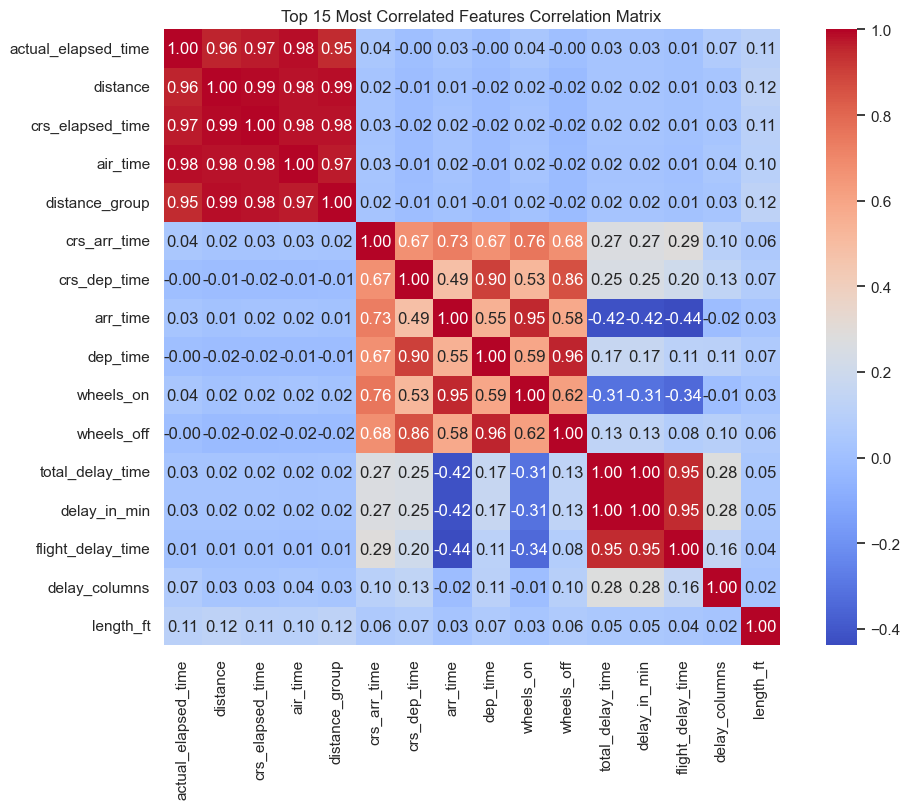

In [188]:
# Ensure that all columns that should be numeric are converted to numeric (non-numeric will become NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaN values after coercion
df = df.dropna(axis=1, how='all')

#Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the absolute correlation matrix
abs_corr_matrix = correlation_matrix.abs()

#  Get the top 16 features with the highest correlation (excluding self-correlation)
top_features = abs_corr_matrix.sum().nlargest(16).index

# Create the top correlation matrix for the top features
top_corr_matrix = correlation_matrix.loc[top_features, top_features]

#  Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Top 15 Most Correlated Features Correlation Matrix')
plt.show()


Top 10 Correlations:
total_delay_time     delay_in_min      1.000000
le_ident             he_ident          1.000000
Unnamed: 0           date              0.999881
date                 week_of_year      0.997933
Unnamed: 0           week_of_year      0.997858
crs_elapsed_time     distance          0.989691
distance             distance_group    0.987793
actual_elapsed_time  air_time          0.983450
air_time             distance          0.979027
crs_elapsed_time     air_time          0.978577
dtype: float64


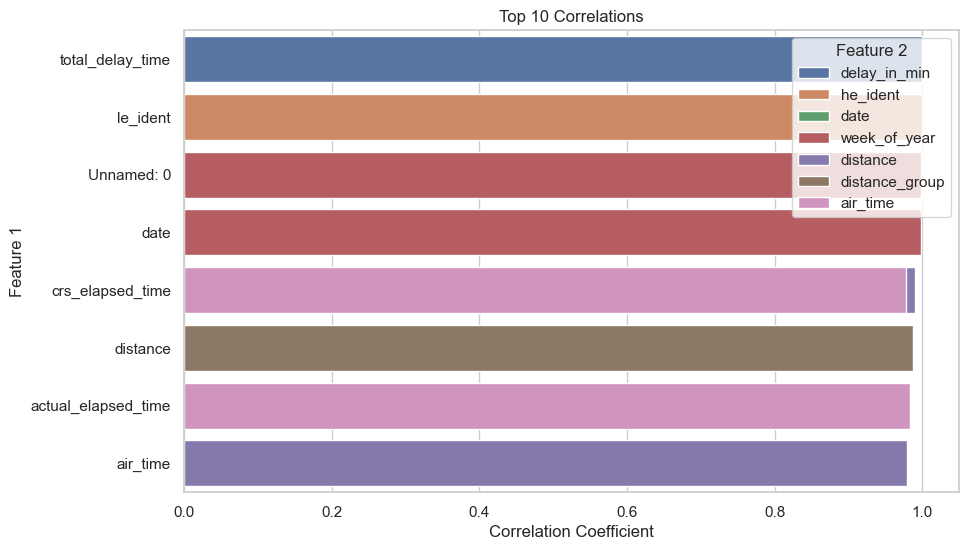

In [189]:
# Calculate the Correlation Matrix
correlation_matrix = df.corr()

# Get the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Stack the upper triangle matrix and sort by absolute correlation
top_correlations = upper_triangle.stack().abs().sort_values(ascending=False).head(10)

# Display the top correlations
print("Top 10 Correlations:")
print(top_correlations)

# visualize these top correlations
top_correlations_df = top_correlations.reset_index()
top_correlations_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_correlations_df, x='Correlation', y='Feature 1', hue='Feature 2', dodge=False)
plt.title('Top 10 Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature 1')
plt.legend(title='Feature 2')
plt.show()


In [190]:
df.head()

,Unnamed: 0,day_of_week,date,op_carrier_fl_num,crs_dep_time,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,...,delay_time_min,arr_time_HHMM,crs_arr_time_HHMM,delay_in_min,year,month,day,is_tour_date,is_nfl_game_day,has_delay
0,-1.732050,-1.465133,1682899200000000000,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
1,-1.732050,-1.465133,1682899200000000000,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
2,-1.732049,-1.465133,1682899200000000000,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
3,-1.732048,-1.465133,1682899200000000000,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
4,-1.732047,-1.465133,1682899200000000000,1.901145,0.783449,0.741602,-0.207042,0.727686,0.702153,0.11582,...,-0.257886,0,0,-0.087922,0.0,-1.272476,-1.577464,0,False,1


In [ ]:
print(df.isnull().sum())

In [198]:
df.head()

,Unnamed: 0,day_of_week,date,op_carrier_fl_num,crs_dep_time,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,...,delay_time_min,arr_time_HHMM,crs_arr_time_HHMM,delay_in_min,year,month,day,is_tour_date,is_nfl_game_day,has_delay
0,-1.732050,-1.465133,1682899200000000000,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
1,-1.732050,-1.465133,1682899200000000000,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
2,-1.732049,-1.465133,1682899200000000000,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
3,-1.732048,-1.465133,1682899200000000000,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
4,-1.732047,-1.465133,1682899200000000000,1.901145,0.783449,0.741602,-0.207042,0.727686,0.702153,0.11582,...,-0.257886,0,0,-0.087922,0.0,-1.272476,-1.577464,0,False,1


In [200]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

print(df.head())


   Unnamed: 0  day_of_week       date  op_carrier_fl_num  crs_dep_time  \
0   -1.732050    -1.465133 2023-05-01           1.741760     -0.240441   
1   -1.732050    -1.465133 2023-05-01           1.741760     -0.240441   
2   -1.732049    -1.465133 2023-05-01           1.741760     -0.240441   
3   -1.732048    -1.465133 2023-05-01           1.741760     -0.240441   
4   -1.732047    -1.465133 2023-05-01           1.901145      0.783449   

   dep_time  taxi_out  wheels_off  wheels_on  taxi_in  ...  delay_time_min  \
0 -0.248312 -0.425851   -0.258242  -0.248803 -0.16580  ...       -0.257886   
1 -0.248312 -0.425851   -0.258242  -0.248803 -0.16580  ...       -0.257886   
2 -0.248312 -0.425851   -0.258242  -0.248803 -0.16580  ...       -0.257886   
3 -0.248312 -0.425851   -0.258242  -0.248803 -0.16580  ...       -0.257886   
4  0.741602 -0.207042    0.727686   0.702153  0.11582  ...       -0.257886   

   arr_time_HHMM  crs_arr_time_HHMM  delay_in_min  year     month       day  \
0      

In [202]:
# SAVE
df = df.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\preprocessing1erasdates.csv', index=False)